# LOGISTIC REGRESSION

In [ ]:
# Data Exploration

In [1]:
import numpy as np # importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
# to render plots in the notebook

In [5]:

# Loading dataset

df= pd.read_csv('Titanic_train.csv')

In [7]:
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [846]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [848]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [852]:
df['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [9]:
df.shape

(891, 12)

In [13]:
import math

In [ ]:
# Finding the sum of null values in the columns

In [19]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Datatypes of columns

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [33]:
df.Name.value_counts()

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

In [ ]:
# Since name column is categorical and with unique values, this is changed into index

In [35]:
df_new=df.set_index('Name')
df_new

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Allen, Mr. William Henry                                 3    male  35.0   
...                                                    ...     ...   ...   
Montvila, Rev. Juozas                                    2    male  27.0   
Graham, Miss. Margaret Edith                             1  female  19.0   
Johnston, Miss. Catherine Helen "Carrie"                 3  female   NaN   
Behr, Mr. Karl Howell                                    1    male  26.0   
Dooley, Mr. Patrick                                      3    male  32.0   

                                                    SibSp  Parch  \
Name                                                               
Braund, Mr. Owen Harris                                 1      0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0   
Heikkinen, Miss. Laina                                  0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0   
Allen, Mr. William Henry                                0      0   
...                                                   ...    ...   
Montvila, Rev. Juozas                                   0      0   
Graham, Miss. Margaret Edith                            0      0   
Johnston, Miss. Catherine Helen "Carrie"                1      2   
Behr, Mr. Karl Howell                                   0      0   
Dooley, Mr. Patrick                                     0      0   

                                                              Ticket     Fare  \
Name                                                                            
Braund, Mr. Owen Harris                                    A/5 21171   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          PC 17599  71.2833   
Heikkinen, Miss. Laina                              STON/O2. 3101282   7.9250   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  113803  53.1000   
Allen, Mr. William Henry                                      373450   8.0500   
...                                                              ...      ...   
Montvila, Rev. Juozas                                         211536  13.0000   
Graham, Miss. Margaret Edith                                  112053  30.0000   
Johnston, Miss. Catherine Helen "Carrie"                  W./C. 6607  23.4500   
Behr, Mr. Karl Howell                                         111369  30.0000   
Dooley, Mr. Patrick                                           370376   7.7500   

                                                   Cabin Embarked  
Name                                                  

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, Braund, Mr. Owen Harris to Dooley, Mr. Patrick
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [ ]:
# Finding value counts of each columns or variables that are categorical

In [51]:
df_new.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [53]:
df_new.Ticket.value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [63]:
df_new['Ticket'].nunique()

681

In [65]:
df_new['Embarked'].nunique()

3

In [55]:
df_new.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [61]:
df_new['Cabin'].nunique() # No. of unique values

147

In [57]:
df_new.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [59]:
df_new[df_new.duplicated()]
# No duplicates

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [67]:
# Since there are many unique values in Cabin and Ticket, there is a high cardinality.

# In order to check if there is a significant impact on target variable, we are doing the chi square test.

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df_new['Cabin'], df_new['Embarked'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")


Chi-Square Statistic: 364.0470733625434
P-value: 0.002031277646831002


In [ ]:
#       Since p value < 0.05, the column Cabin has significant impact on the target variable. Hence data transformation need to be performed.

In [69]:
# Create a contingency table
contingency_table = pd.crosstab(df_new['Ticket'], df_new['Embarked'])

# Perform the Chi-Square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p_value}")


Chi-Square Statistic: 1770.2158816425122
P-value: 2.2561436019379125e-13


In [ ]:
#       Since p value < 0.05, the column Ticket has significant impact on the target variable. Hence data transformation need to be performed.

In [ ]:
# Data Transformation

In [71]:
# One hot encoding for target variable

In [81]:
#Creating dummy variable for 'Embarked' column


df_new_1=pd.get_dummies(df_new,columns=['Embarked'])


In [83]:
df_new_1


PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Allen, Mr. William Henry                                 3    male  35.0   
...                                                    ...     ...   ...   
Montvila, Rev. Juozas                                    2    male  27.0   
Graham, Miss. Margaret Edith                             1  female  19.0   
Johnston, Miss. Catherine Helen "Carrie"                 3  female   NaN   
Behr, Mr. Karl Howell                                    1    male  26.0   
Dooley, Mr. Patrick                                      3    male  32.0   

                                                    SibSp  Parch  \
Name                                                               
Braund, Mr. Owen Harris                                 1      0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0   
Heikkinen, Miss. Laina                                  0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0   
Allen, Mr. William Henry                                0      0   
...                                                   ...    ...   
Montvila, Rev. Juozas                                   0      0   
Graham, Miss. Margaret Edith                            0      0   
Johnston, Miss. Catherine Helen "Carrie"                1      2   
Behr, Mr. Karl Howell                                   0      0   
Dooley, Mr. Patrick                                     0      0   

                                                              Ticket     Fare  \
Name                                                                            
Braund, Mr. Owen Harris                                    A/5 21171   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          PC 17599  71.2833   
Heikkinen, Miss. Laina                              STON/O2. 3101282   7.9250   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  113803  53.1000   
Allen, Mr. William Henry                                      373450   8.0500   
...                                                              ...      ...   
Montvila, Rev. Juozas                                         211536  13.0000   
Graham, Miss. Margaret Edith                                  112053  30.0000   
Johnston, Miss. Catherine Helen "Carrie"                  W./C. 6607  23.4500   
Behr, Mr. Karl Howell                                         111369  30.0000   
Dooley, Mr. Patrick                                           370376   7.7500   

                                                   Cabin  Embarked_C  \
Name                                              

In [85]:
# Changing True and False into numerical using astype

In [91]:
df_new_1['Embarked_C']=df_new_1['Embarked_C'].astype(int)

In [93]:
df_new_1

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Allen, Mr. William Henry                                 3    male  35.0   
...                                                    ...     ...   ...   
Montvila, Rev. Juozas                                    2    male  27.0   
Graham, Miss. Margaret Edith                             1  female  19.0   
Johnston, Miss. Catherine Helen "Carrie"                 3  female   NaN   
Behr, Mr. Karl Howell                                    1    male  26.0   
Dooley, Mr. Patrick                                      3    male  32.0   

                                                    SibSp  Parch  \
Name                                                               
Braund, Mr. Owen Harris                                 1      0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0   
Heikkinen, Miss. Laina                                  0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0   
Allen, Mr. William Henry                                0      0   
...                                                   ...    ...   
Montvila, Rev. Juozas                                   0      0   
Graham, Miss. Margaret Edith                            0      0   
Johnston, Miss. Catherine Helen "Carrie"                1      2   
Behr, Mr. Karl Howell                                   0      0   
Dooley, Mr. Patrick                                     0      0   

                                                              Ticket     Fare  \
Name                                                                            
Braund, Mr. Owen Harris                                    A/5 21171   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          PC 17599  71.2833   
Heikkinen, Miss. Laina                              STON/O2. 3101282   7.9250   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  113803  53.1000   
Allen, Mr. William Henry                                      373450   8.0500   
...                                                              ...      ...   
Montvila, Rev. Juozas                                         211536  13.0000   
Graham, Miss. Margaret Edith                                  112053  30.0000   
Johnston, Miss. Catherine Helen "Carrie"                  W./C. 6607  23.4500   
Behr, Mr. Karl Howell                                         111369  30.0000   
Dooley, Mr. Patrick                                           370376   7.7500   

                                                   Cabin  Embarked_C  \
Name                                              

In [97]:
df_new_1[['Embarked_Q','Embarked_S']]=df_new_1[['Embarked_Q','Embarked_S']].astype(int)

In [131]:
df_new_1

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass     Sex   Age  \
Name                                                                       
Braund, Mr. Owen Harris                                  3    male  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  female  38.0   
Heikkinen, Miss. Laina                                   3  female  26.0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  female  35.0   
Allen, Mr. William Henry                                 3    male  35.0   
...                                                    ...     ...   ...   
Montvila, Rev. Juozas                                    2    male  27.0   
Graham, Miss. Margaret Edith                             1  female  19.0   
Johnston, Miss. Catherine Helen "Carrie"                 3  female   NaN   
Behr, Mr. Karl Howell                                    1    male  26.0   
Dooley, Mr. Patrick                                      3    male  32.0   

                                                    SibSp  Parch  \
Name                                                               
Braund, Mr. Owen Harris                                 1      0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0   
Heikkinen, Miss. Laina                                  0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            1      0   
Allen, Mr. William Henry                                0      0   
...                                                   ...    ...   
Montvila, Rev. Juozas                                   0      0   
Graham, Miss. Margaret Edith                            0      0   
Johnston, Miss. Catherine Helen "Carrie"                1      2   
Behr, Mr. Karl Howell                                   0      0   
Dooley, Mr. Patrick                                     0      0   

                                                              Ticket     Fare  \
Name                                                                            
Braund, Mr. Owen Harris                                    A/5 21171   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          PC 17599  71.2833   
Heikkinen, Miss. Laina                              STON/O2. 3101282   7.9250   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  113803  53.1000   
Allen, Mr. William Henry                                      373450   8.0500   
...                                                              ...      ...   
Montvila, Rev. Juozas                                         211536  13.0000   
Graham, Miss. Margaret Edith                                  112053  30.0000   
Johnston, Miss. Catherine Helen "Carrie"                  W./C. 6607  23.4500   
Behr, Mr. Karl Howell                                         111369  30.0000   
Dooley, Mr. Patrick                                           370376   7.7500   

                                                   Cabin  Embarked_C  \
Name                                              

In [ ]:
# Changing sex into numerical columns using one hot encoding

In [133]:
df_new_2=pd.get_dummies(df_new_1,columns=['Sex'])

In [103]:
df_new_2

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   
Heikkinen, Miss. Laina                                   3  26.0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  35.0      1   
Allen, Mr. William Henry                                 3  35.0      0   
...                                                    ...   ...    ...   
Montvila, Rev. Juozas                                    2  27.0      0   
Graham, Miss. Margaret Edith                             1  19.0      0   
Johnston, Miss. Catherine Helen "Carrie"                 3   NaN      1   
Behr, Mr. Karl Howell                                    1  26.0      0   
Dooley, Mr. Patrick                                      3  32.0      0   

                                                    Parch            Ticket  \
Name                                                                          
Braund, Mr. Owen Harris                                 0         A/5 21171   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0          PC 17599   
Heikkinen, Miss. Laina                                  0  STON/O2. 3101282   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            0            113803   
Allen, Mr. William Henry                                0            373450   
...                                                   ...               ...   
Montvila, Rev. Juozas                                   0            211536   
Graham, Miss. Margaret Edith                            0            112053   
Johnston, Miss. Catherine Helen "Carrie"                2        W./C. 6607   
Behr, Mr. Karl Howell                                   0            111369   
Dooley, Mr. Patrick                                     0            370376   

                                                       Fare Cabin  Embarked_C  \
Name                                                                            
Braund, Mr. Owen Harris                              7.2500   NaN           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...  71.2833   C85           1   
Heikkinen, Miss. Laina                               7.9250   NaN           0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)        53.1000  C123           0   
Allen, Mr. William Henry                             8.0500   NaN           0   
...                                                     ...   ...         ...   
Montvila, Rev. Juozas                               13.0000   NaN           0   
Graham, Miss. Margaret Edith                        30.0000   B42           0   
Johnston, Miss. Catherine Helen "Carrie"            23.4500   NaN           0   
Behr, Mr. Karl Howell                               30.0000  C148           1   
Dooley, Mr. Patrick                                  7.7500   NaN         

In [ ]:
# Convert into numerical

In [105]:
df_new_2[['Sex_female','Sex_male']]=df_new_2[['Sex_female','Sex_male']].astype(int)

In [107]:
df_new_2

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   
Heikkinen, Miss. Laina                                   3  26.0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  35.0      1   
Allen, Mr. William Henry                                 3  35.0      0   
...                                                    ...   ...    ...   
Montvila, Rev. Juozas                                    2  27.0      0   
Graham, Miss. Margaret Edith                             1  19.0      0   
Johnston, Miss. Catherine Helen "Carrie"                 3   NaN      1   
Behr, Mr. Karl Howell                                    1  26.0      0   
Dooley, Mr. Patrick                                      3  32.0      0   

                                                    Parch            Ticket  \
Name                                                                          
Braund, Mr. Owen Harris                                 0         A/5 21171   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0          PC 17599   
Heikkinen, Miss. Laina                                  0  STON/O2. 3101282   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            0            113803   
Allen, Mr. William Henry                                0            373450   
...                                                   ...               ...   
Montvila, Rev. Juozas                                   0            211536   
Graham, Miss. Margaret Edith                            0            112053   
Johnston, Miss. Catherine Helen "Carrie"                2        W./C. 6607   
Behr, Mr. Karl Howell                                   0            111369   
Dooley, Mr. Patrick                                     0            370376   

                                                       Fare Cabin  Embarked_C  \
Name                                                                            
Braund, Mr. Owen Harris                              7.2500   NaN           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...  71.2833   C85           1   
Heikkinen, Miss. Laina                               7.9250   NaN           0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)        53.1000  C123           0   
Allen, Mr. William Henry                             8.0500   NaN           0   
...                                                     ...   ...         ...   
Montvila, Rev. Juozas                               13.0000   NaN           0   
Graham, Miss. Margaret Edith                        30.0000   B42           0   
Johnston, Miss. Catherine Helen "Carrie"            23.4500   NaN           0   
Behr, Mr. Karl Howell                               30.0000  C148           1   
Dooley, Mr. Patrick                                  7.7500   NaN         

In [111]:
df_new_2.describe() #summary statistics

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Embarked_C  Embarked_Q  Embarked_S  Sex_female  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.381594   32.204208    0.188552    0.086420    0.722783    0.352413   
std      0.806057   49.693429    0.391372    0.281141    0.447876    0.477990   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    7.910400    0.000000    0.000000    0.000000    0.000000   
50%      0.000000   14.454200    0.000000    0.000000    1.000000    0.000000   
75%      0.000000   31.000000    0.000000    0.000000    1.000000    1.000000   
max      6.000000  512.329200    1.000000    1.000000    1.000000    1.000000   

         Sex_male  
count  891.000000  
mean     0.647587  
std      0.477990  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000

In [115]:
df_new_2.isnull().sum()  # Finding the null values

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Sex_female       0
Sex_male         0
dtype: int64

In [117]:
# Handling missing values of age. Substituting median values in age. Data imputation.

In [162]:
df_new_2['Age'].isnull().sum()

177

In [164]:
# Check for nulls
print("Null values before:", df_new_2['Age'].isnull().sum())

# Convert to numeric if needed
df_new_2['Age'] = pd.to_numeric(df_new_2['Age'], errors='coerce')

# Calculate median
median_value = df_new_2['Age'].median()
print("Median value:", median_value)

# Fill nulls
df_new_2['Age'] = df_new_2['Age'].fillna(median_value)

# Verify nulls are filled
print("Null values after:", df_new_2['Age'].isnull().sum())


Null values before: 177
Median value: 28.0
Null values after: 0


In [170]:
df_new_2['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [172]:
df_new_2['Cabin'].nunique()

147

In [176]:
df_new_2['Cabin'].isnull().sum()

687

In [178]:
687+147 

834

In [180]:
(147/834)*100 # (% of positive values)

17.62589928057554

In [182]:
100-17.6 # (% of null values)

82.4

In [184]:
# If more than 40% of a data is missing or NA, it is appropriate to not include that feature in model building as this may lead to incorrect results.

In [357]:
df_new_3=df_new_2

In [359]:
df_new_3.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Ticket     Fare  \
Name                                                                            
Braund, Mr. Owen Harris                                 0  A/5 21171   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0   PC 17599  71.2833   

                                                   Cabin  Embarked_C  \
Name                                                                   
Braund, Mr. Owen Harris                              NaN           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...   C85           1   

                                                    Embarked_Q  Embarked_S  \
Name                                                                         
Braund, Mr. Owen Harris                                      0           1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           0           0   

                                                    Sex_female  Sex_male  
Name                                                                      
Braund, Mr. Owen Harris                                  False      True  
Cumings, Mrs. John Bradley (Florence Briggs Tha...        True     False

In [361]:
df_new_3=df_new_3.drop(['Cabin'],axis=1)

In [363]:
df_new_3

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   
Heikkinen, Miss. Laina                                   3  26.0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  35.0      1   
Allen, Mr. William Henry                                 3  35.0      0   
...                                                    ...   ...    ...   
Montvila, Rev. Juozas                                    2  27.0      0   
Graham, Miss. Margaret Edith                             1  19.0      0   
Johnston, Miss. Catherine Helen "Carrie"                 3  28.0      1   
Behr, Mr. Karl Howell                                    1  26.0      0   
Dooley, Mr. Patrick                                      3  32.0      0   

                                                    Parch            Ticket  \
Name                                                                          
Braund, Mr. Owen Harris                                 0         A/5 21171   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0          PC 17599   
Heikkinen, Miss. Laina                                  0  STON/O2. 3101282   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            0            113803   
Allen, Mr. William Henry                                0            373450   
...                                                   ...               ...   
Montvila, Rev. Juozas                                   0            211536   
Graham, Miss. Margaret Edith                            0            112053   
Johnston, Miss. Catherine Helen "Carrie"                2        W./C. 6607   
Behr, Mr. Karl Howell                                   0            111369   
Dooley, Mr. Patrick                                     0            370376   

                                                       Fare  Embarked_C  \
Name                                                                      
Braund, Mr. Owen Harris                              7.2500           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...  71.2833           1   
Heikkinen, Miss. Laina                               7.9250           0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)        53.1000           0   
Allen, Mr. William Henry                             8.0500           0   
...                                                     ...         ...   
Montvila, Rev. Juozas                               13.0000           0   
Graham, Miss. Margaret Edith                        30.0000           0   
Johnston, Miss. Catherine Helen "Carrie"            23.4500           0   
Behr, Mr. Karl Howell                               30.0000           1   
Dooley, Mr. Patrick                                  7.7500           0   

                                                    Embarked_Q  Embark

In [365]:
df_new_3['Ticket'].nunique()

681

In [367]:
df_new_3.isnull().sum() # All null values are removed

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Sex_female     0
Sex_male       0
dtype: int64

In [ ]:
# Converting Ticket column from categorical to numerical for further calculations using Logistic regression. 
# Since one-hot encoding will create numerous columns, this cannot be employed in this scenario.
# Frequency encoding can create many duplicates. So combining k-fold target encoding and frequency encoding for data conversion.

In [ ]:
# KFold: A method from sklearn that splits the data into K subsets (folds) for cross-validation. Here, it is used for k-fold target encoding.

In [369]:
from sklearn.model_selection import KFold

In [ ]:
# Frequency encoding

In [373]:
frequency_encoding_1= df_new_3['Ticket'].value_counts().to_dict()
df_new_3['Frequency']=df_new_3['Ticket'].map(frequency_encoding_1)

In [253]:
# Counts how many times each unique value in the City column appears. Converts the value_counts() result into a dictionary.
# Replaces each city in the City column with its frequency using the dictionary. A new column, Frequency, is added to the DataFrame.


In [375]:
df_new_3.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Ticket     Fare  \
Name                                                                            
Braund, Mr. Owen Harris                                 0  A/5 21171   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0   PC 17599  71.2833   

                                                    Embarked_C  Embarked_Q  \
Name                                                                         
Braund, Mr. Owen Harris                                      0           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1           0   

                                                    Embarked_S  Sex_female  \
Name                                                                         
Braund, Mr. Owen Harris                                      1       False   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           0        True   

                                                    Sex_male  Frequency  
Name                                                                     
Braund, Mr. Owen Harris                                 True          1  
Cumings, Mrs. John Bradley (Florence Briggs Tha...     False          1

In [ ]:
# Initialize K-Fold Target Encoding.
# There are 3 target variables due to one hot encoding.

In [377]:
kf = KFold(n_splits=2, shuffle=True, random_state = 42)
# Initialize arrays to store target-encoded values for each target column
target_encoded_C = np.zeros(len(df_new_3))
target_encoded_Q = np.zeros(len(df_new_3))
target_encoded_S = np.zeros(len(df_new_3))

In [267]:
# KFold(n_splits=2):
# Splits the data into 2 folds for cross-validation. Each fold is used as validation once, while the remaining fold(s) are used for training.
# shuffle=True: Shuffles the data before splitting to ensure randomness.
# random_state=42: Ensures reproducibility of the splits.


# target_encoded:
# Initializes an array of zeros with the same length as the DataFrame to store the target encoding values.


In [273]:
# kf
# target_encoded

In [275]:
# K-fold target encoding

In [379]:
# Perform K-Fold encoding

# Loop through each fold:
# train_idx: Indices of rows used for training.
# val_idx: Indices of rows used for validation.
# Split the Data:
# train: Data for training in the current fold.
# val: Data for validation in the current fold.
# Calculate Mean Target:
# train.groupby('City')['Target'].mean():
# Groups the train DataFrame by City and calculates the mean of the Target column for each city.
# Example for a fold:

# London: 0.33
# New York: 1.00
# Paris: 0.00

# Assign Encoded Values:
# Maps the calculated mean target value to the cities in the validation set.
# val_idx ensures the correct rows are updated in the target_encoded array.

                                                                               

for train_idx, val_idx in kf.split(df_new_3):
    train, val = df_new_3.iloc[train_idx], df_new_3.iloc[val_idx]

# Compute mean target for each one-hot encoded target column
    mean_target_C = train.groupby('Ticket')['Embarked_C'].mean()
    mean_target_Q = train.groupby('Ticket')['Embarked_Q'].mean()
    mean_target_S = train.groupby('Ticket')['Embarked_S'].mean()

# Map the mean target values to the validation set
    target_encoded_C[val_idx] = val['Ticket'].map(mean_target_C)
    target_encoded_Q[val_idx] = val['Ticket'].map(mean_target_Q)
    target_encoded_S[val_idx] = val['Ticket'].map(mean_target_S)

# Add encoded columns back to the dataframe

df_new_3['Target_Encoded_C'] = target_encoded_C
df_new_3['Target_Encoded_Q'] = target_encoded_Q
df_new_3['Target_Encoded_S'] = target_encoded_S

print(df_new_3)


# Explanation of Changes
# Multiple Target Columns:

# The targets Embarked_C, Embarked_Q, and Embarked_S are handled separately.
# A separate target-encoded column is computed for each target.
# Initialize Arrays for Encoded Values:

# Arrays target_encoded_C, target_encoded_Q, and target_encoded_S are used to store the encoded values for each target column.
# Compute Mean for Each Target:

# The groupby operation calculates the mean of Embarked_C, Embarked_Q, and Embarked_S for each category in the Embarked column in the training data.
# Map Encoded Values to Validation Data:

# The calculated means are mapped back to the City column in the validation data for each fold.
# Add Encoded Columns to DataFrame:

# The target-encoded columns Target_Encoded_C, Target_Encoded_Q, and Target_Encoded_S are added to the DataFrame.


                                                    PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

In [383]:
df_new_3.head(3)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   
Heikkinen, Miss. Laina                                   3  26.0      0   

                                                    Parch            Ticket  \
Name                                                                          
Braund, Mr. Owen Harris                                 0         A/5 21171   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0          PC 17599   
Heikkinen, Miss. Laina                                  0  STON/O2. 3101282   

                                                       Fare  Embarked_C  \
Name                                                                      
Braund, Mr. Owen Harris                              7.2500           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...  71.2833           1   
Heikkinen, Miss. Laina                               7.9250           0   

                                                    Embarked_Q  Embarked_S  \
Name                                                                         
Braund, Mr. Owen Harris                                      0           1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           0           0   
Heikkinen, Miss. Laina                                       0           1   

                                                    Sex_female  Sex_male  \
Name                                                                       
Braund, Mr. Owen Harris                                  False      True   
Cumings, Mrs. John Bradley (Florence Briggs Tha...        True     False   
Heikkinen, Miss. Laina                                    True     False   

                                                    Frequency  \
Name                                                            
Braund, Mr. Owen Harris                                     1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          1   
Heikkinen, Miss. Laina                                      1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                          NaN   
Cumings, Mrs. John Bradley (Florence Briggs Tha...               NaN   
Heikkinen, Miss. Laina                                           NaN   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                          NaN   
Cumings, Mrs. John Bradley (Florence Briggs Tha...               NaN   
Heikkinen, Miss. Laina                                           NaN   

                                                    Target_Encoded_S  
Name                                                                  
Braund, Mr. Owen Harris                                          NaN  
Cumings, Mrs. John Bradley (Florence Briggs Tha...               NaN  
Heikkinen, Miss. Laina                                           NaN

In [385]:
df_new_3['Target_Encoded_C'].isnull().sum()

675

In [387]:
df_new_3['Target_Encoded_C'].nunique()

2

In [389]:
df_new_3['Target_Encoded_C'].value_counts()

Target_Encoded_C
0.0    172
1.0     44
Name: count, dtype: int64

In [391]:
df_new_3['Target_Encoded_C'].isnull().sum()

675

In [393]:
len(df_new_3['Target_Encoded_C'])

891

In [395]:
df_new_3['Target_Encoded_Q'].value_counts()

Target_Encoded_Q
0.0    206
1.0     10
Name: count, dtype: int64

In [397]:
df_new_3['Target_Encoded_S'].value_counts()

Target_Encoded_S
1.0    162
0.0     54
Name: count, dtype: int64

In [ ]:
# There are many missing values created. 

In [ ]:
# Why Nulls Appear:
# For certain values, the frequency encoding results in NaN because 'that value' is not in the training set.
# Similarly, Target_Encoded is NaN for 'that value' because it was not part of any training fold during K-Fold encoding.

# In order to avoid NA , I am doing data imputation and substituting median values in these places.

In [ ]:
# Mean imputation

In [399]:
mean_value_1 = df_new_3['Target_Encoded_C'].mean()
print (mean_value_1)

0.2037037037037037


In [401]:
mean_value_2 = df_new_3['Target_Encoded_Q'].mean()
print (mean_value_2)

0.046296296296296294


In [403]:
mean_value_3 = df_new_3['Target_Encoded_S'].mean()
print (mean_value_3)

0.75


In [405]:
df_new_3['Target_Encoded_C'] = df_new_3['Target_Encoded_C'].fillna(mean_value_1)
df_new_3['Target_Encoded_Q'] = df_new_3['Target_Encoded_Q'].fillna(mean_value_2)
df_new_3['Target_Encoded_S'] = df_new_3['Target_Encoded_S'].fillna(mean_value_3)

In [407]:
df_new_3

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   
Heikkinen, Miss. Laina                                   3  26.0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  35.0      1   
Allen, Mr. William Henry                                 3  35.0      0   
...                                                    ...   ...    ...   
Montvila, Rev. Juozas                                    2  27.0      0   
Graham, Miss. Margaret Edith                             1  19.0      0   
Johnston, Miss. Catherine Helen "Carrie"                 3  28.0      1   
Behr, Mr. Karl Howell                                    1  26.0      0   
Dooley, Mr. Patrick                                      3  32.0      0   

                                                    Parch            Ticket  \
Name                                                                          
Braund, Mr. Owen Harris                                 0         A/5 21171   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0          PC 17599   
Heikkinen, Miss. Laina                                  0  STON/O2. 3101282   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            0            113803   
Allen, Mr. William Henry                                0            373450   
...                                                   ...               ...   
Montvila, Rev. Juozas                                   0            211536   
Graham, Miss. Margaret Edith                            0            112053   
Johnston, Miss. Catherine Helen "Carrie"                2        W./C. 6607   
Behr, Mr. Karl Howell                                   0            111369   
Dooley, Mr. Patrick                                     0            370376   

                                                       Fare  Embarked_C  \
Name                                                                      
Braund, Mr. Owen Harris                              7.2500           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...  71.2833           1   
Heikkinen, Miss. Laina                               7.9250           0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)        53.1000           0   
Allen, Mr. William Henry                             8.0500           0   
...                                                     ...         ...   
Montvila, Rev. Juozas                               13.0000           0   
Graham, Miss. Margaret Edith                        30.0000           0   
Johnston, Miss. Catherine Helen "Carrie"            23.4500           0   
Behr, Mr. Karl Howell                               30.0000           1   
Dooley, Mr. Patrick                                  7.7500           0   

                                                    Embarked_Q  Embark

In [353]:
df_new_3.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked_C          0
Embarked_Q          0
Embarked_S          0
Sex_female          0
Sex_male            0
Target_Encoded_C    0
Target_Encoded_Q    0
Target_Encoded_S    0
dtype: int64

In [414]:
df_new_4=df_new_3
df_new_4 = df_new_4.drop(['Ticket'], axis=1)

In [416]:
df_new_4.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  71.2833   

                                                    Embarked_C  Embarked_Q  \
Name                                                                         
Braund, Mr. Owen Harris                                      0           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1           0   

                                                    Embarked_S  Sex_female  \
Name                                                                         
Braund, Mr. Owen Harris                                      1       False   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           0        True   

                                                    Sex_male  Frequency  \
Name                                                                      
Braund, Mr. Owen Harris                                 True          1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...     False          1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.203704   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.203704   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.046296   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.046296   

                                                    Target_Encoded_S  
Name                                                                  
Braund, Mr. Owen Harris                                         0.75  
Cumings, Mrs. John Bradley (Florence Briggs Tha...              0.75

In [ ]:
# Data Visualization

# Bar plots and histograms

In [434]:
df_new_4[['Sex_female','Sex_male']]=df_new_4[['Sex_female','Sex_male']].astype(int)
# Converting Sex columns into numerical format from boolean

In [438]:
df_new_4.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  71.2833   

                                                    Embarked_C  Embarked_Q  \
Name                                                                         
Braund, Mr. Owen Harris                                      0           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1           0   

                                                    Embarked_S  Sex_female  \
Name                                                                         
Braund, Mr. Owen Harris                                      1           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           0           1   

                                                    Sex_male  Frequency  \
Name                                                                      
Braund, Mr. Owen Harris                                    1          1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...         0          1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.203704   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.203704   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.046296   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.046296   

                                                    Target_Encoded_S  
Name                                                                  
Braund, Mr. Owen Harris                                         0.75  
Cumings, Mrs. John Bradley (Florence Briggs Tha...              0.75

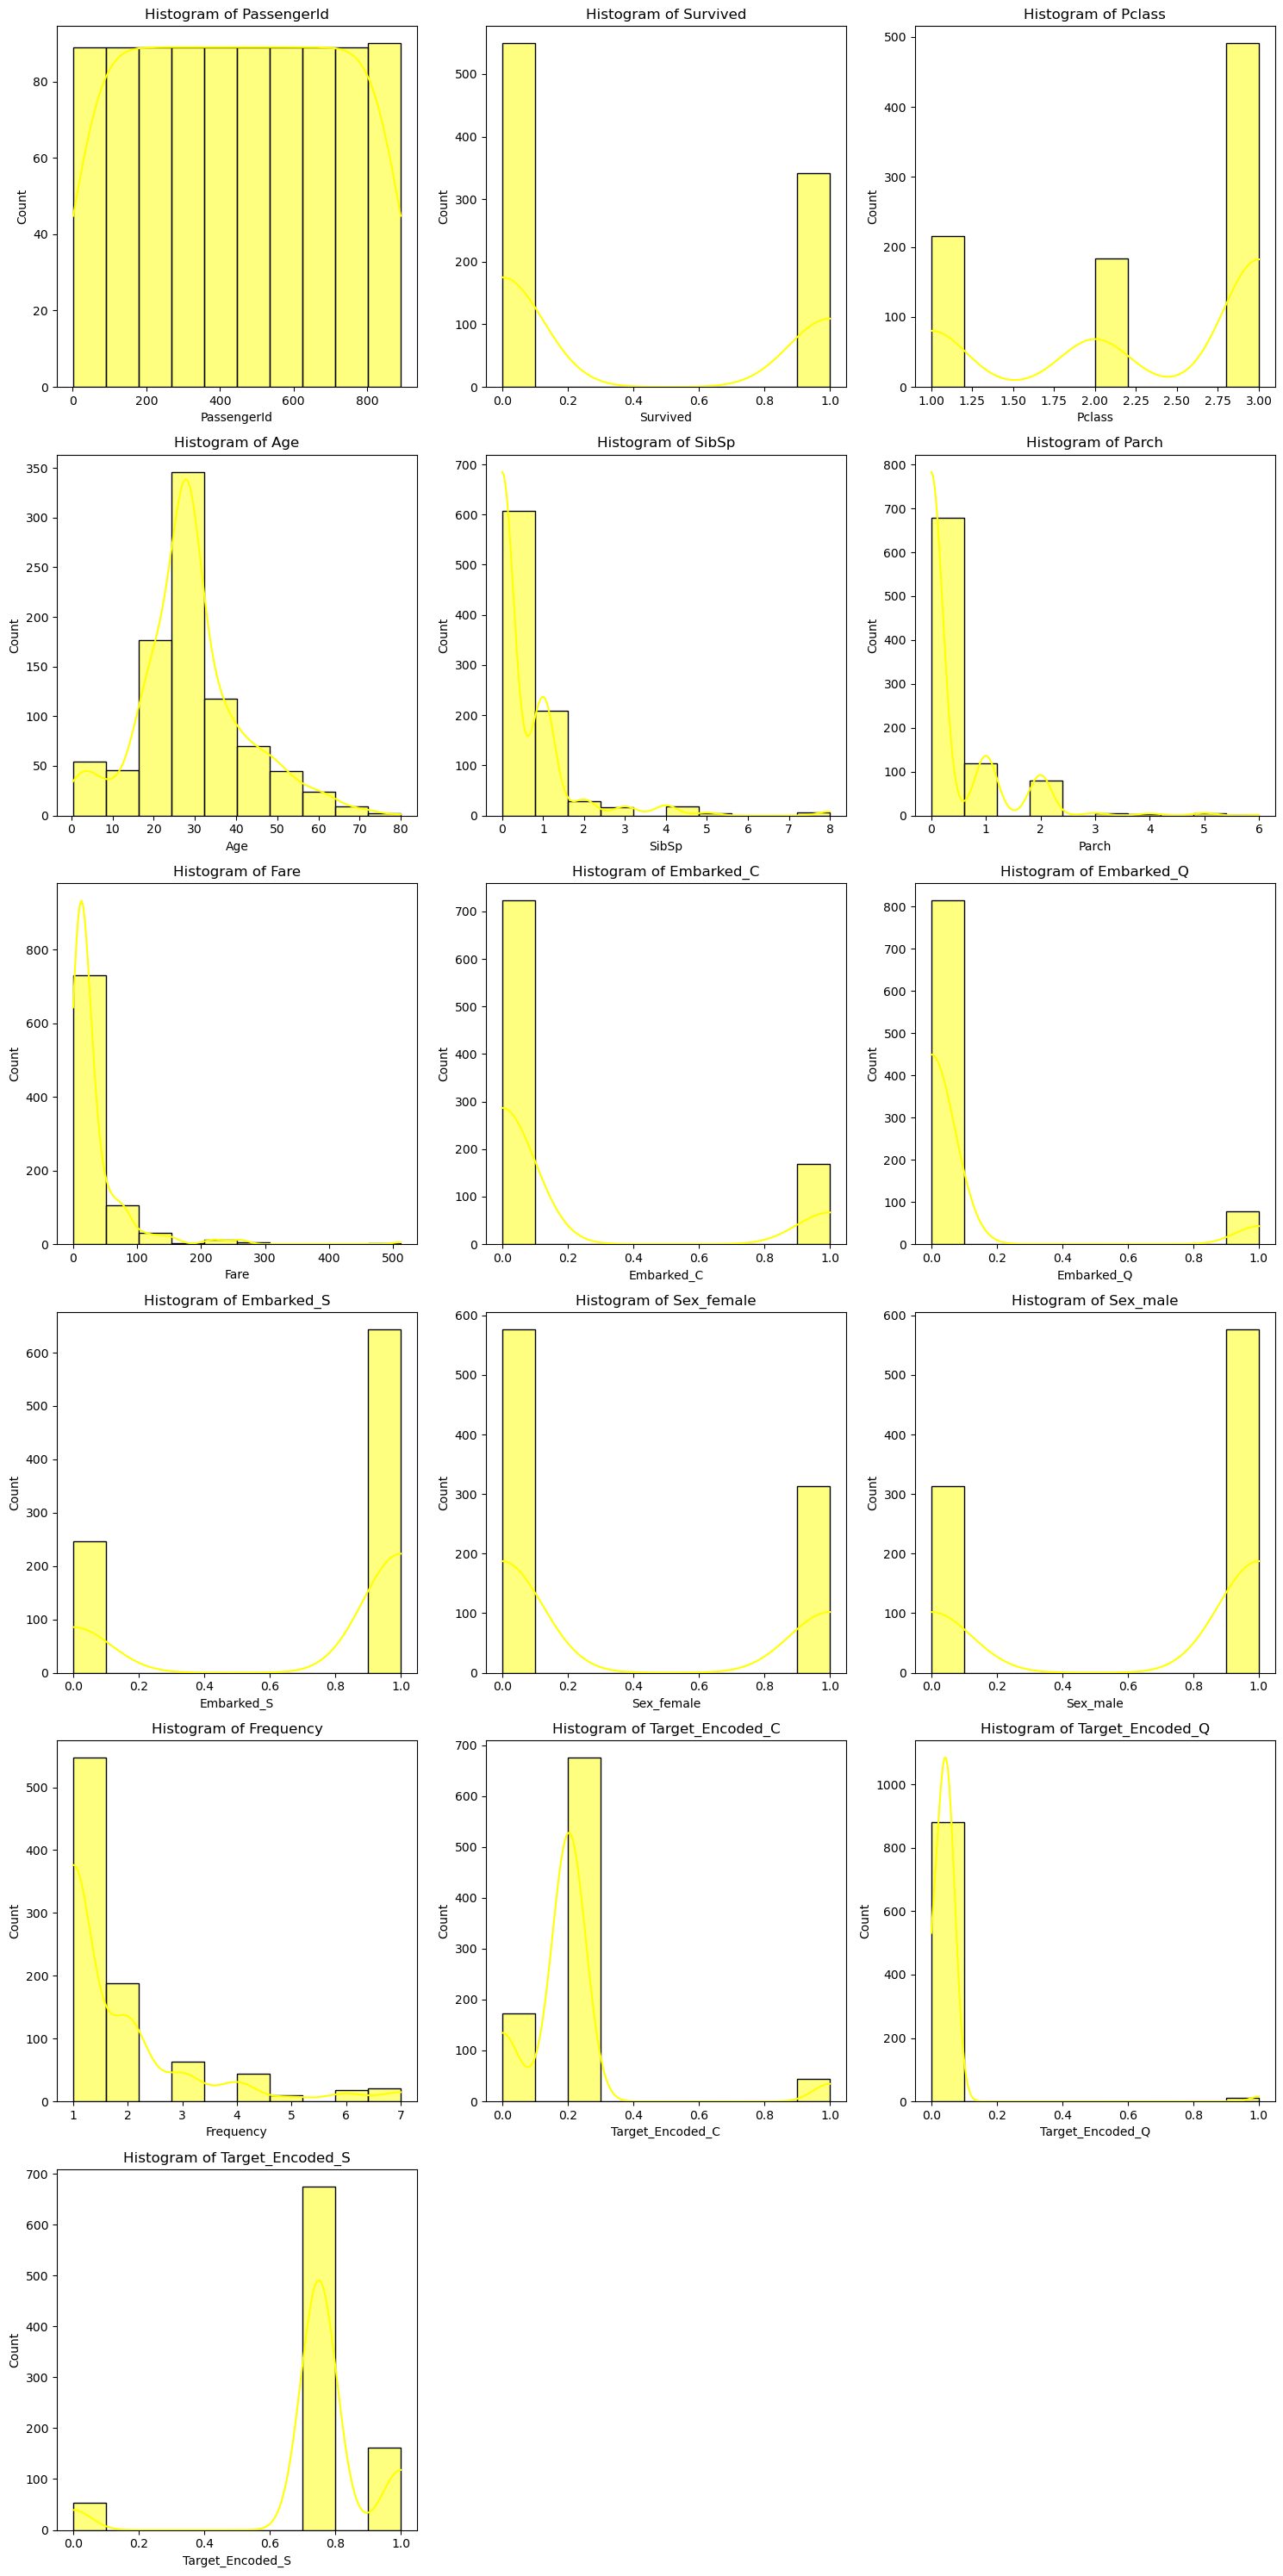

In [440]:
import math

num_cols=len(df_new_4.columns)
rows=math.ceil(num_cols/3)

plt.figure(figsize=(15,rows*5))
for i,col in enumerate(df_new_4.columns,1):
    plt.subplot(rows,3,i)
    sns.histplot(df_new_4[col], kde=True, bins=10, color='yellow')
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [ ]:
# Box plots

# Visualizing boxplots with matplotlib.

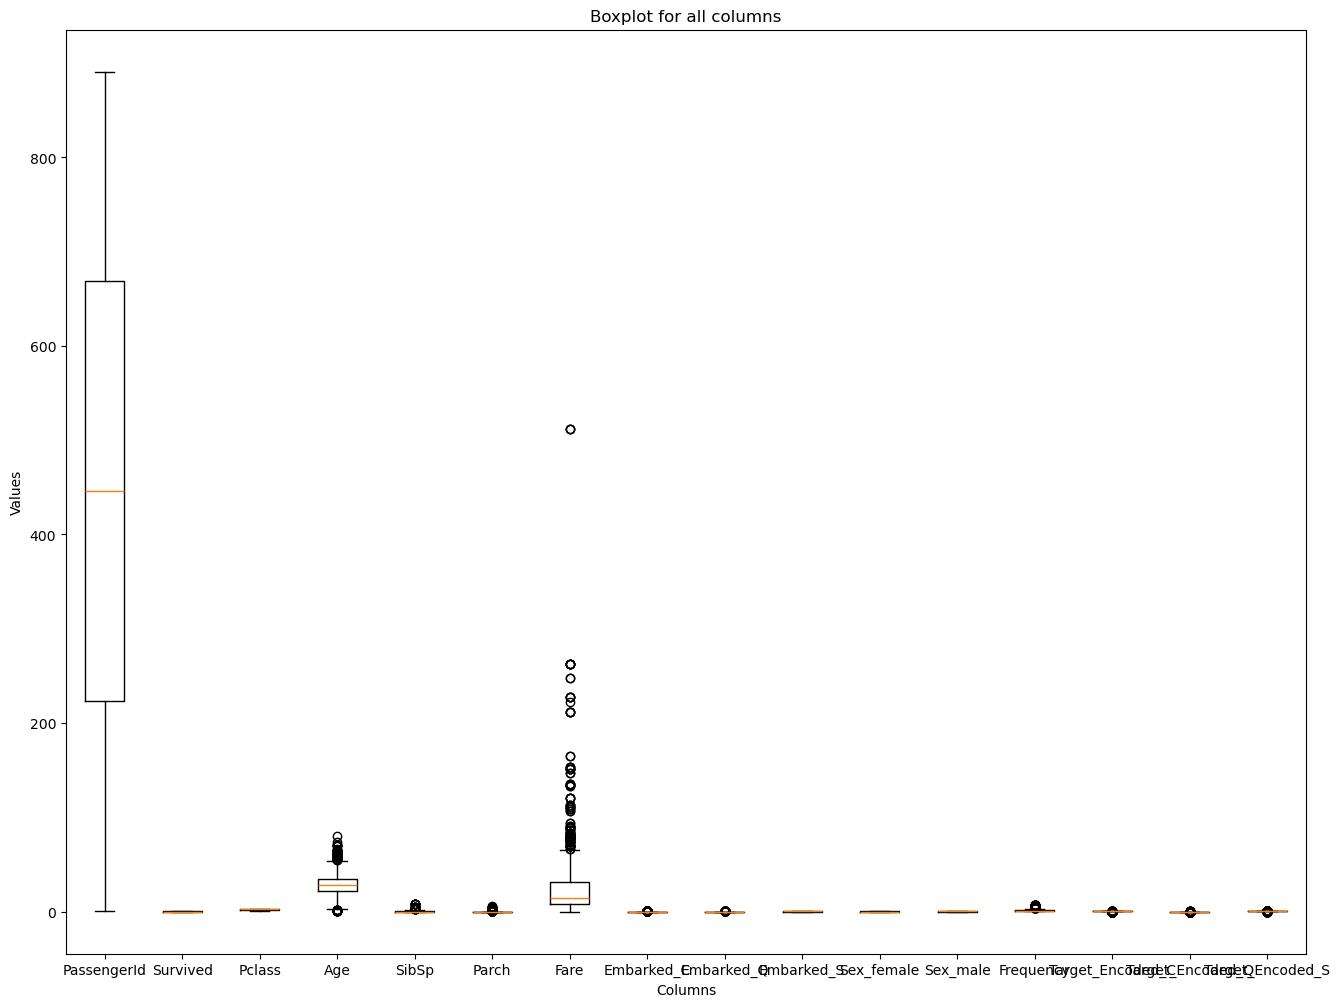

In [442]:
plt.figure(figsize=(16,12)) 
plt.boxplot([df_new_4[col] for col in df_new_4.columns], tick_labels=df_new_4.columns)
plt.title("Boxplot for all columns")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [446]:
# The columns 'Age' and 'Fare' seem to have outliers

In [448]:
# Removing outliers and replacing with medians



def remove_outliers_with_median(df_new_4, selected_columns):
    df_cleaned=df_new_4.copy()
    for col in selected_columns:
        Q1=df_new_4[col].quantile(0.25)
        Q3=df_new_4[col].quantile(0.75)
        IQR=Q3-Q1 #Interquartile range
        
        
#         Range of whiskers
        lower_bound=Q1-1.5*IQR 
        upper_bound=Q3+1.5*IQR
        
#         Replace outliers with median
        median_value_cleaned=df_new_4[col].median()
        df_cleaned[col]=df_new_4[col].apply(lambda x: median_value_cleaned if x<lower_bound or x>upper_bound else x)
        
    return (df_cleaned)
        
selected_columns = ['Age', 'Fare']
df_cleaned = remove_outliers_with_median(df_new_4, selected_columns)


In [ ]:
# For cleaned data, new boxplots are generated

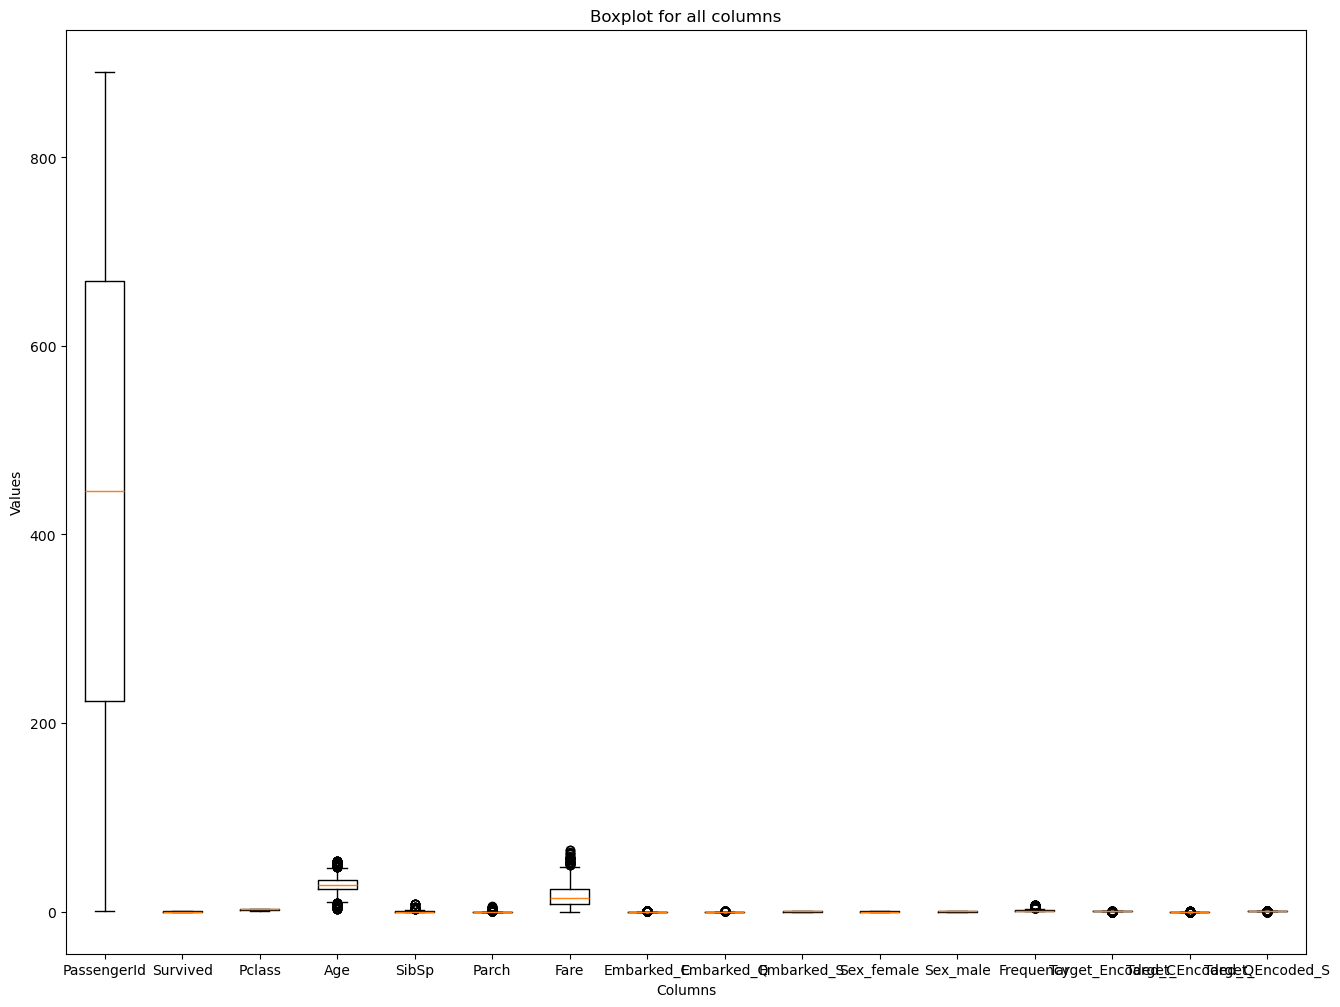

In [452]:
plt.figure(figsize=(16,12)) 
plt.boxplot([df_cleaned[col] for col in df_cleaned.columns], tick_labels=df_cleaned.columns)
plt.title("Boxplot for all columns")
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

In [454]:
# Correlation check

In [456]:
# Using pair plot

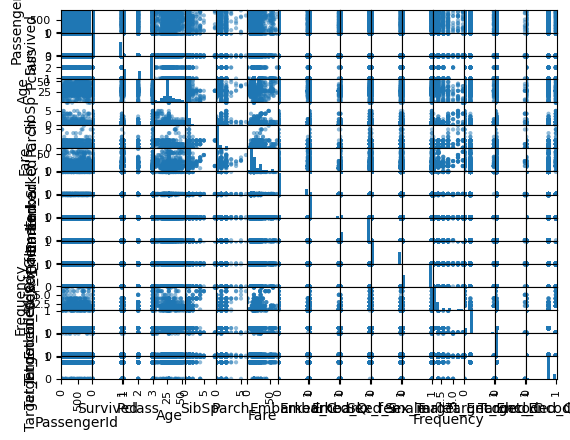

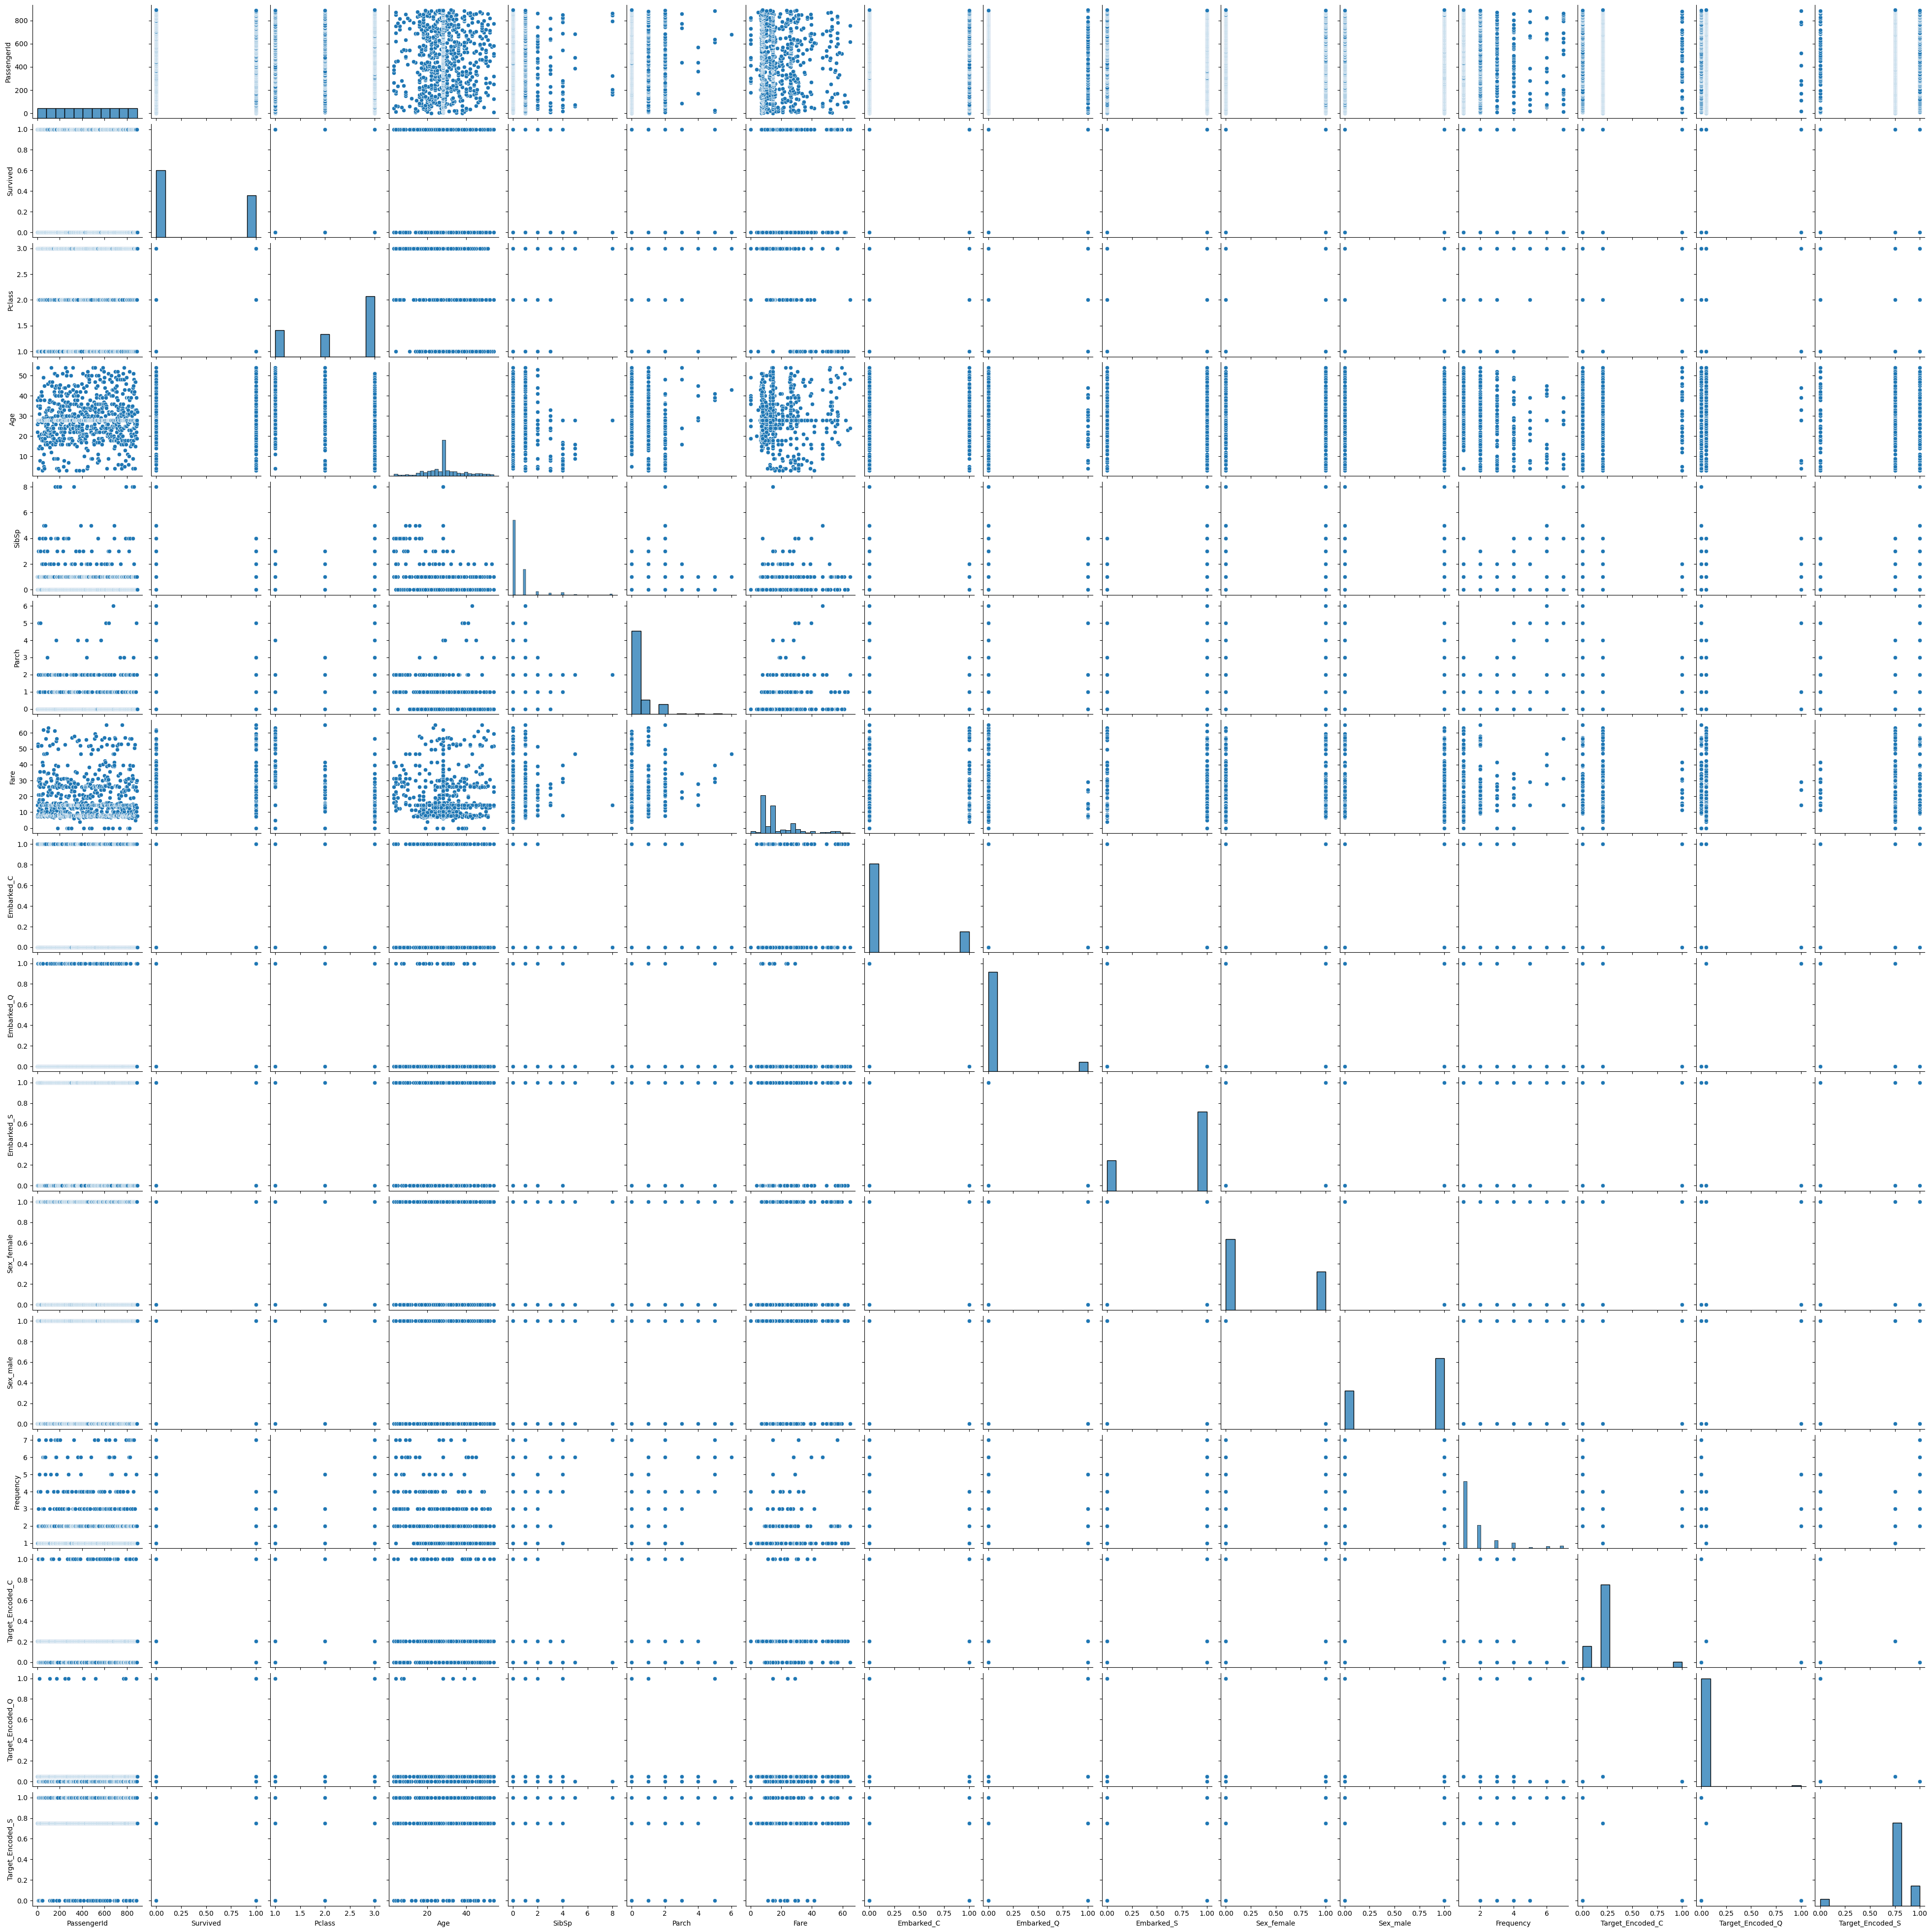

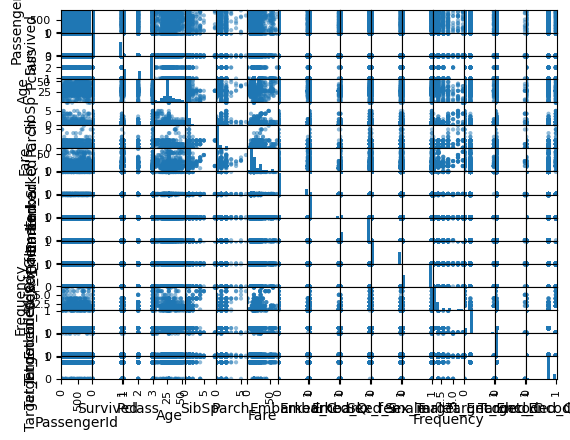

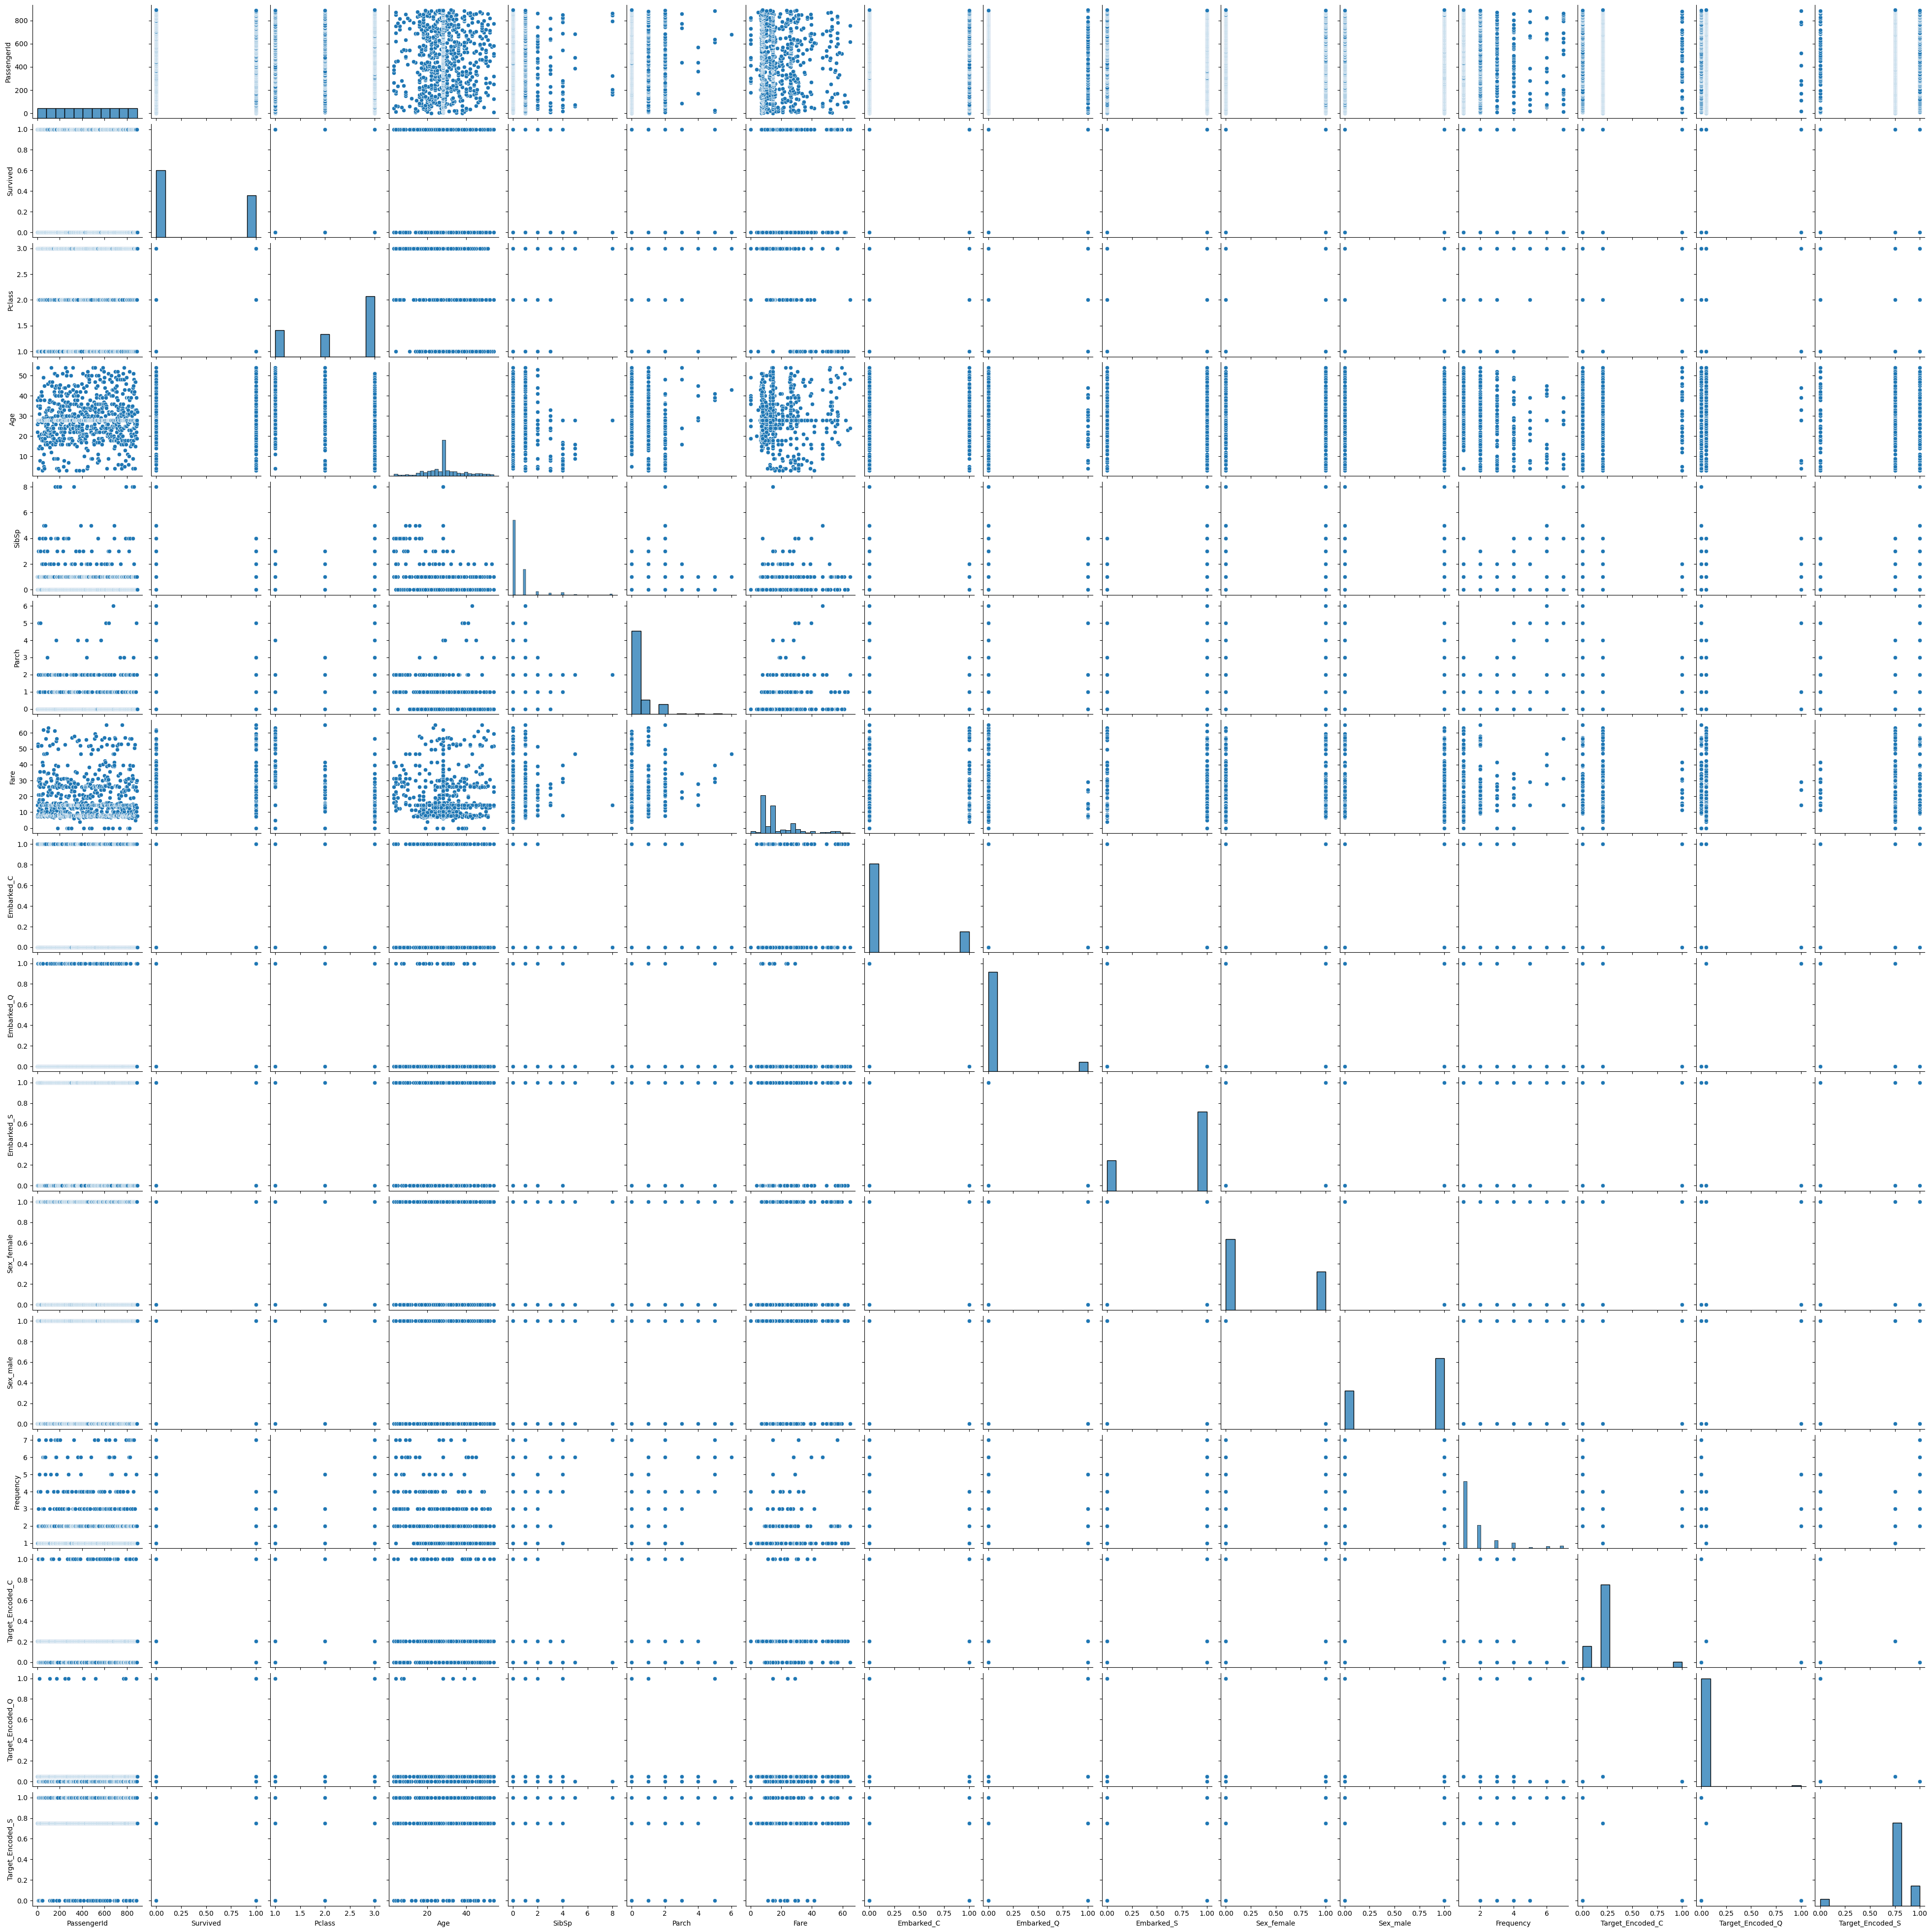

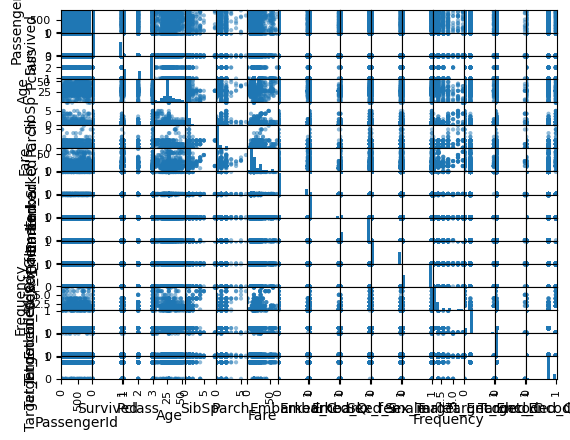

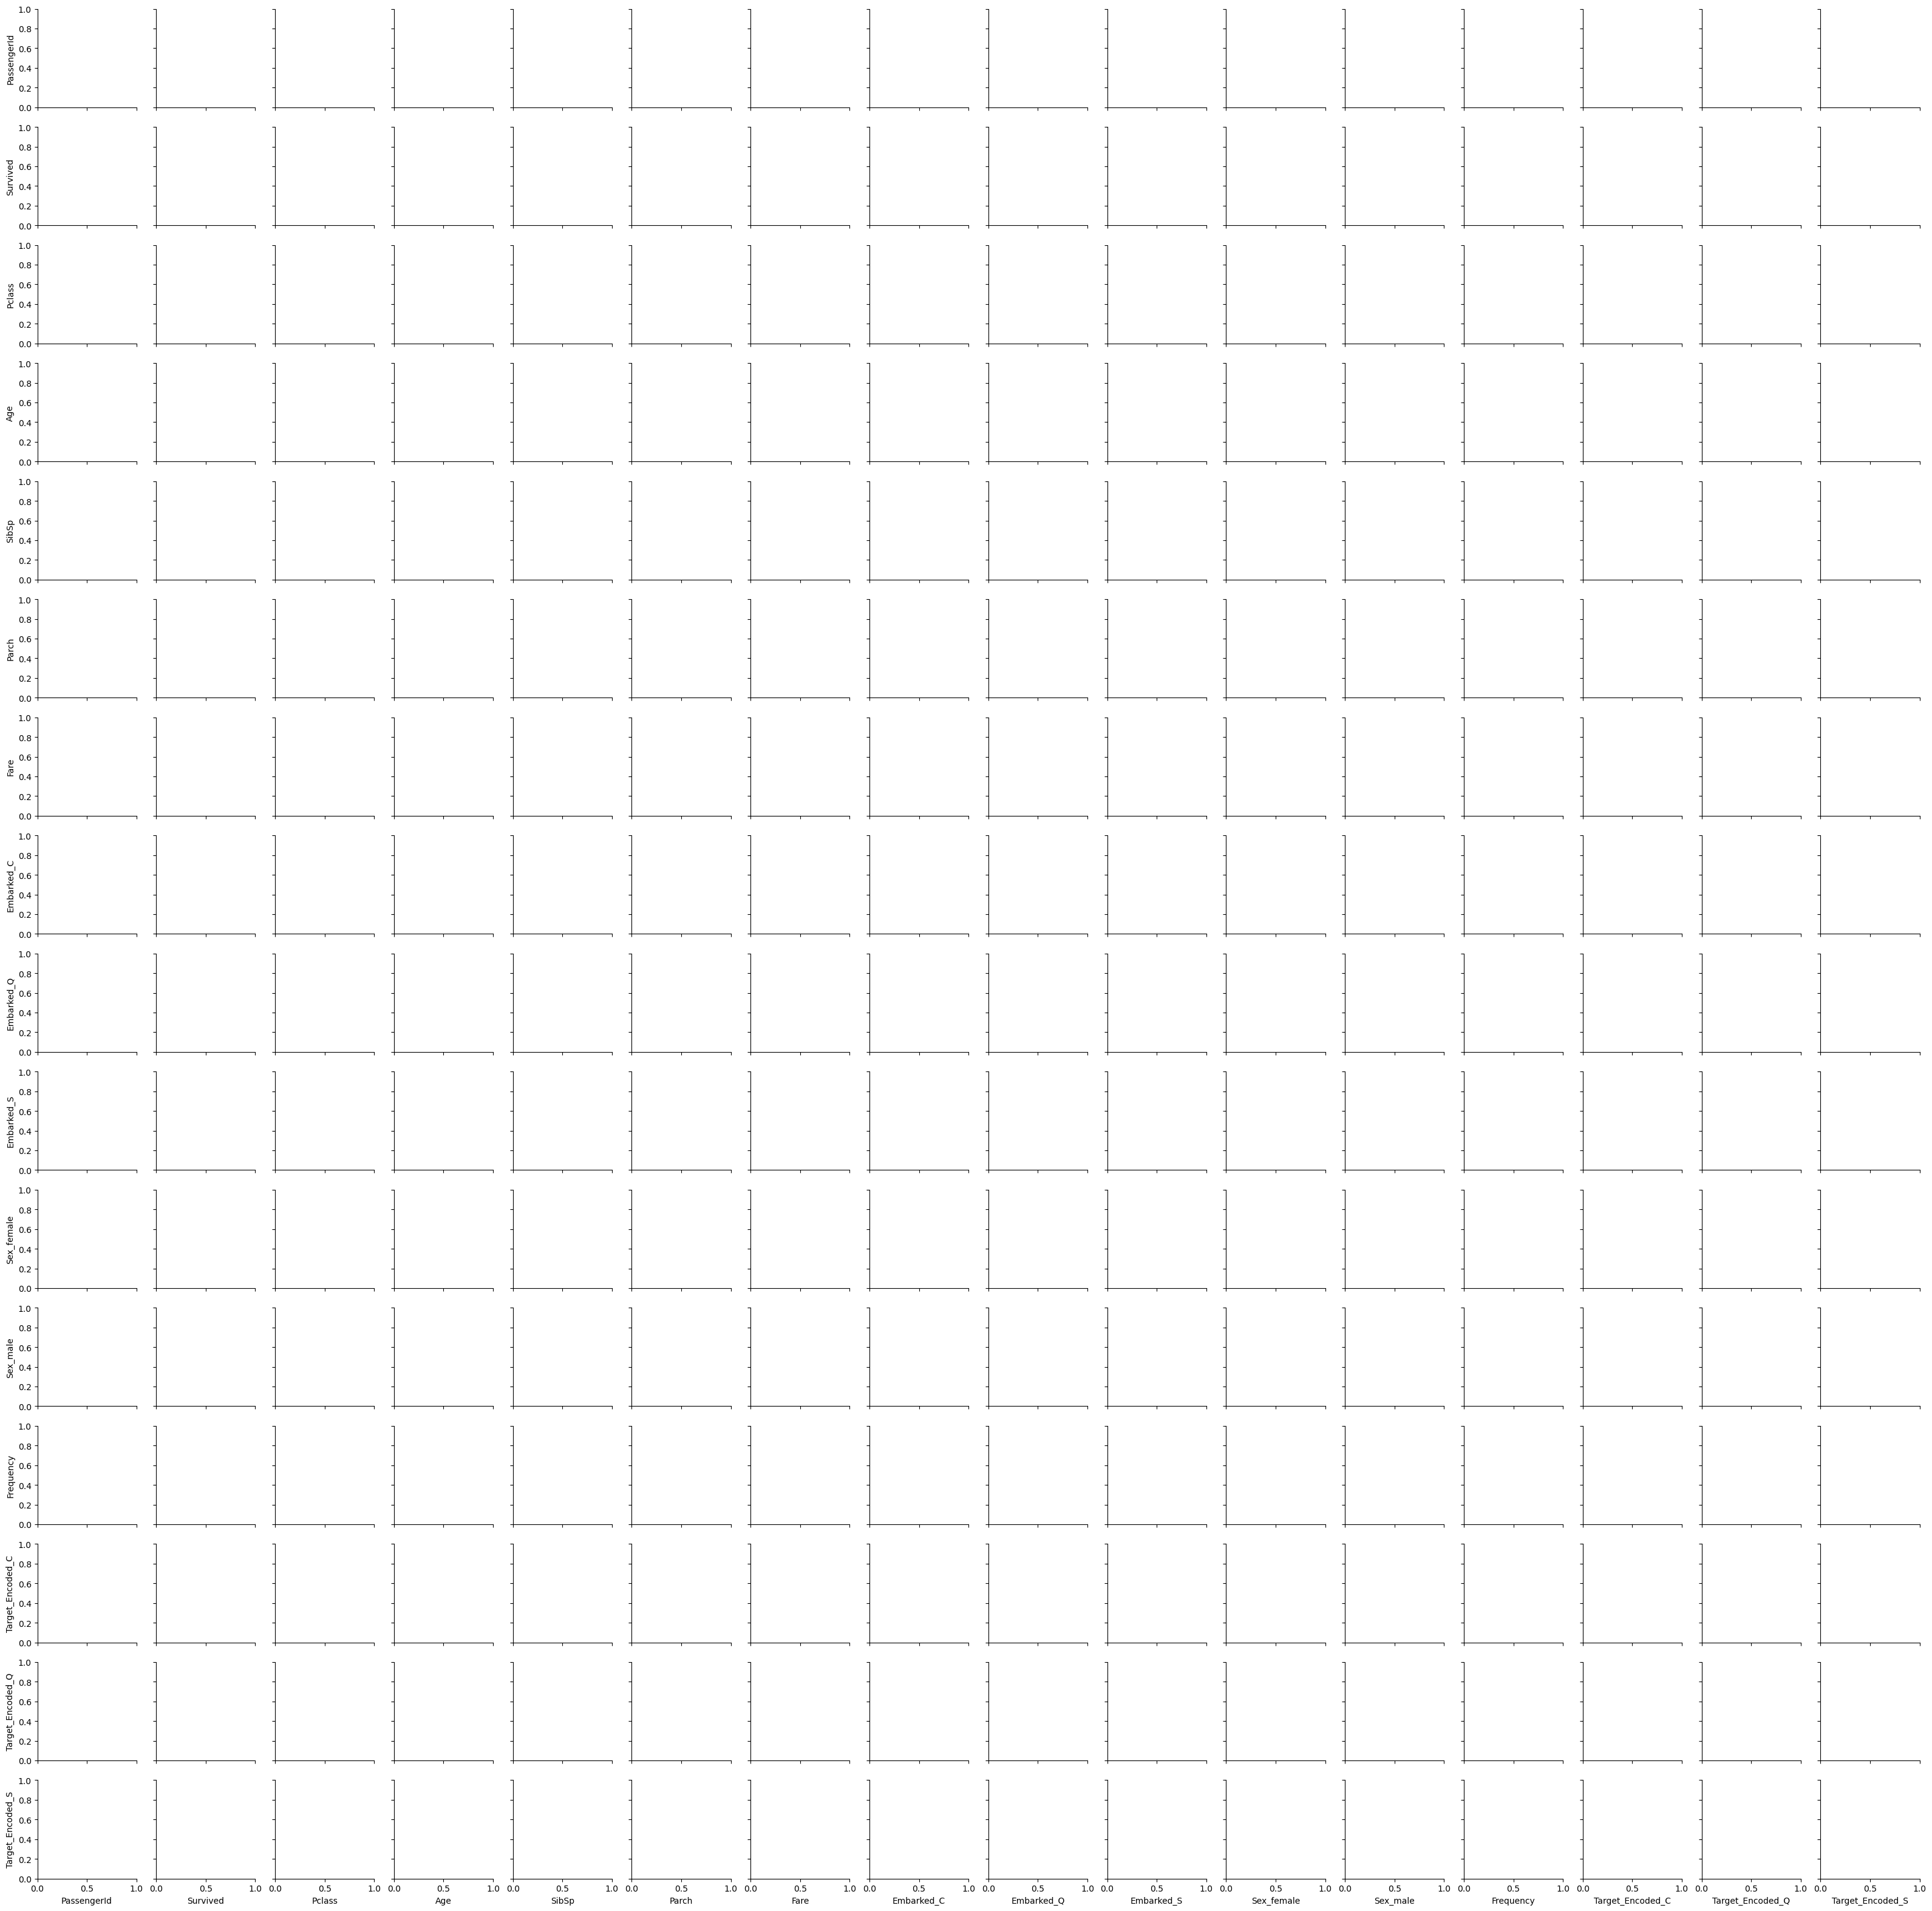

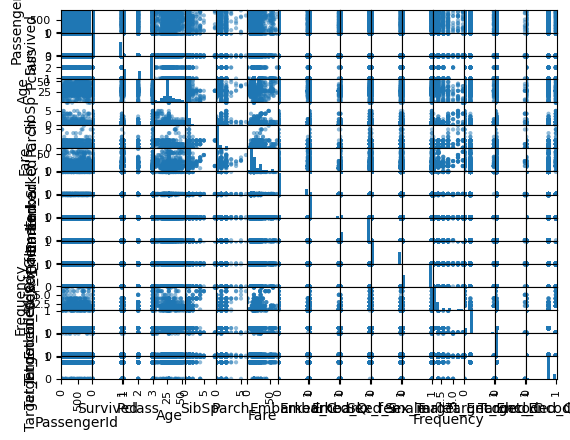

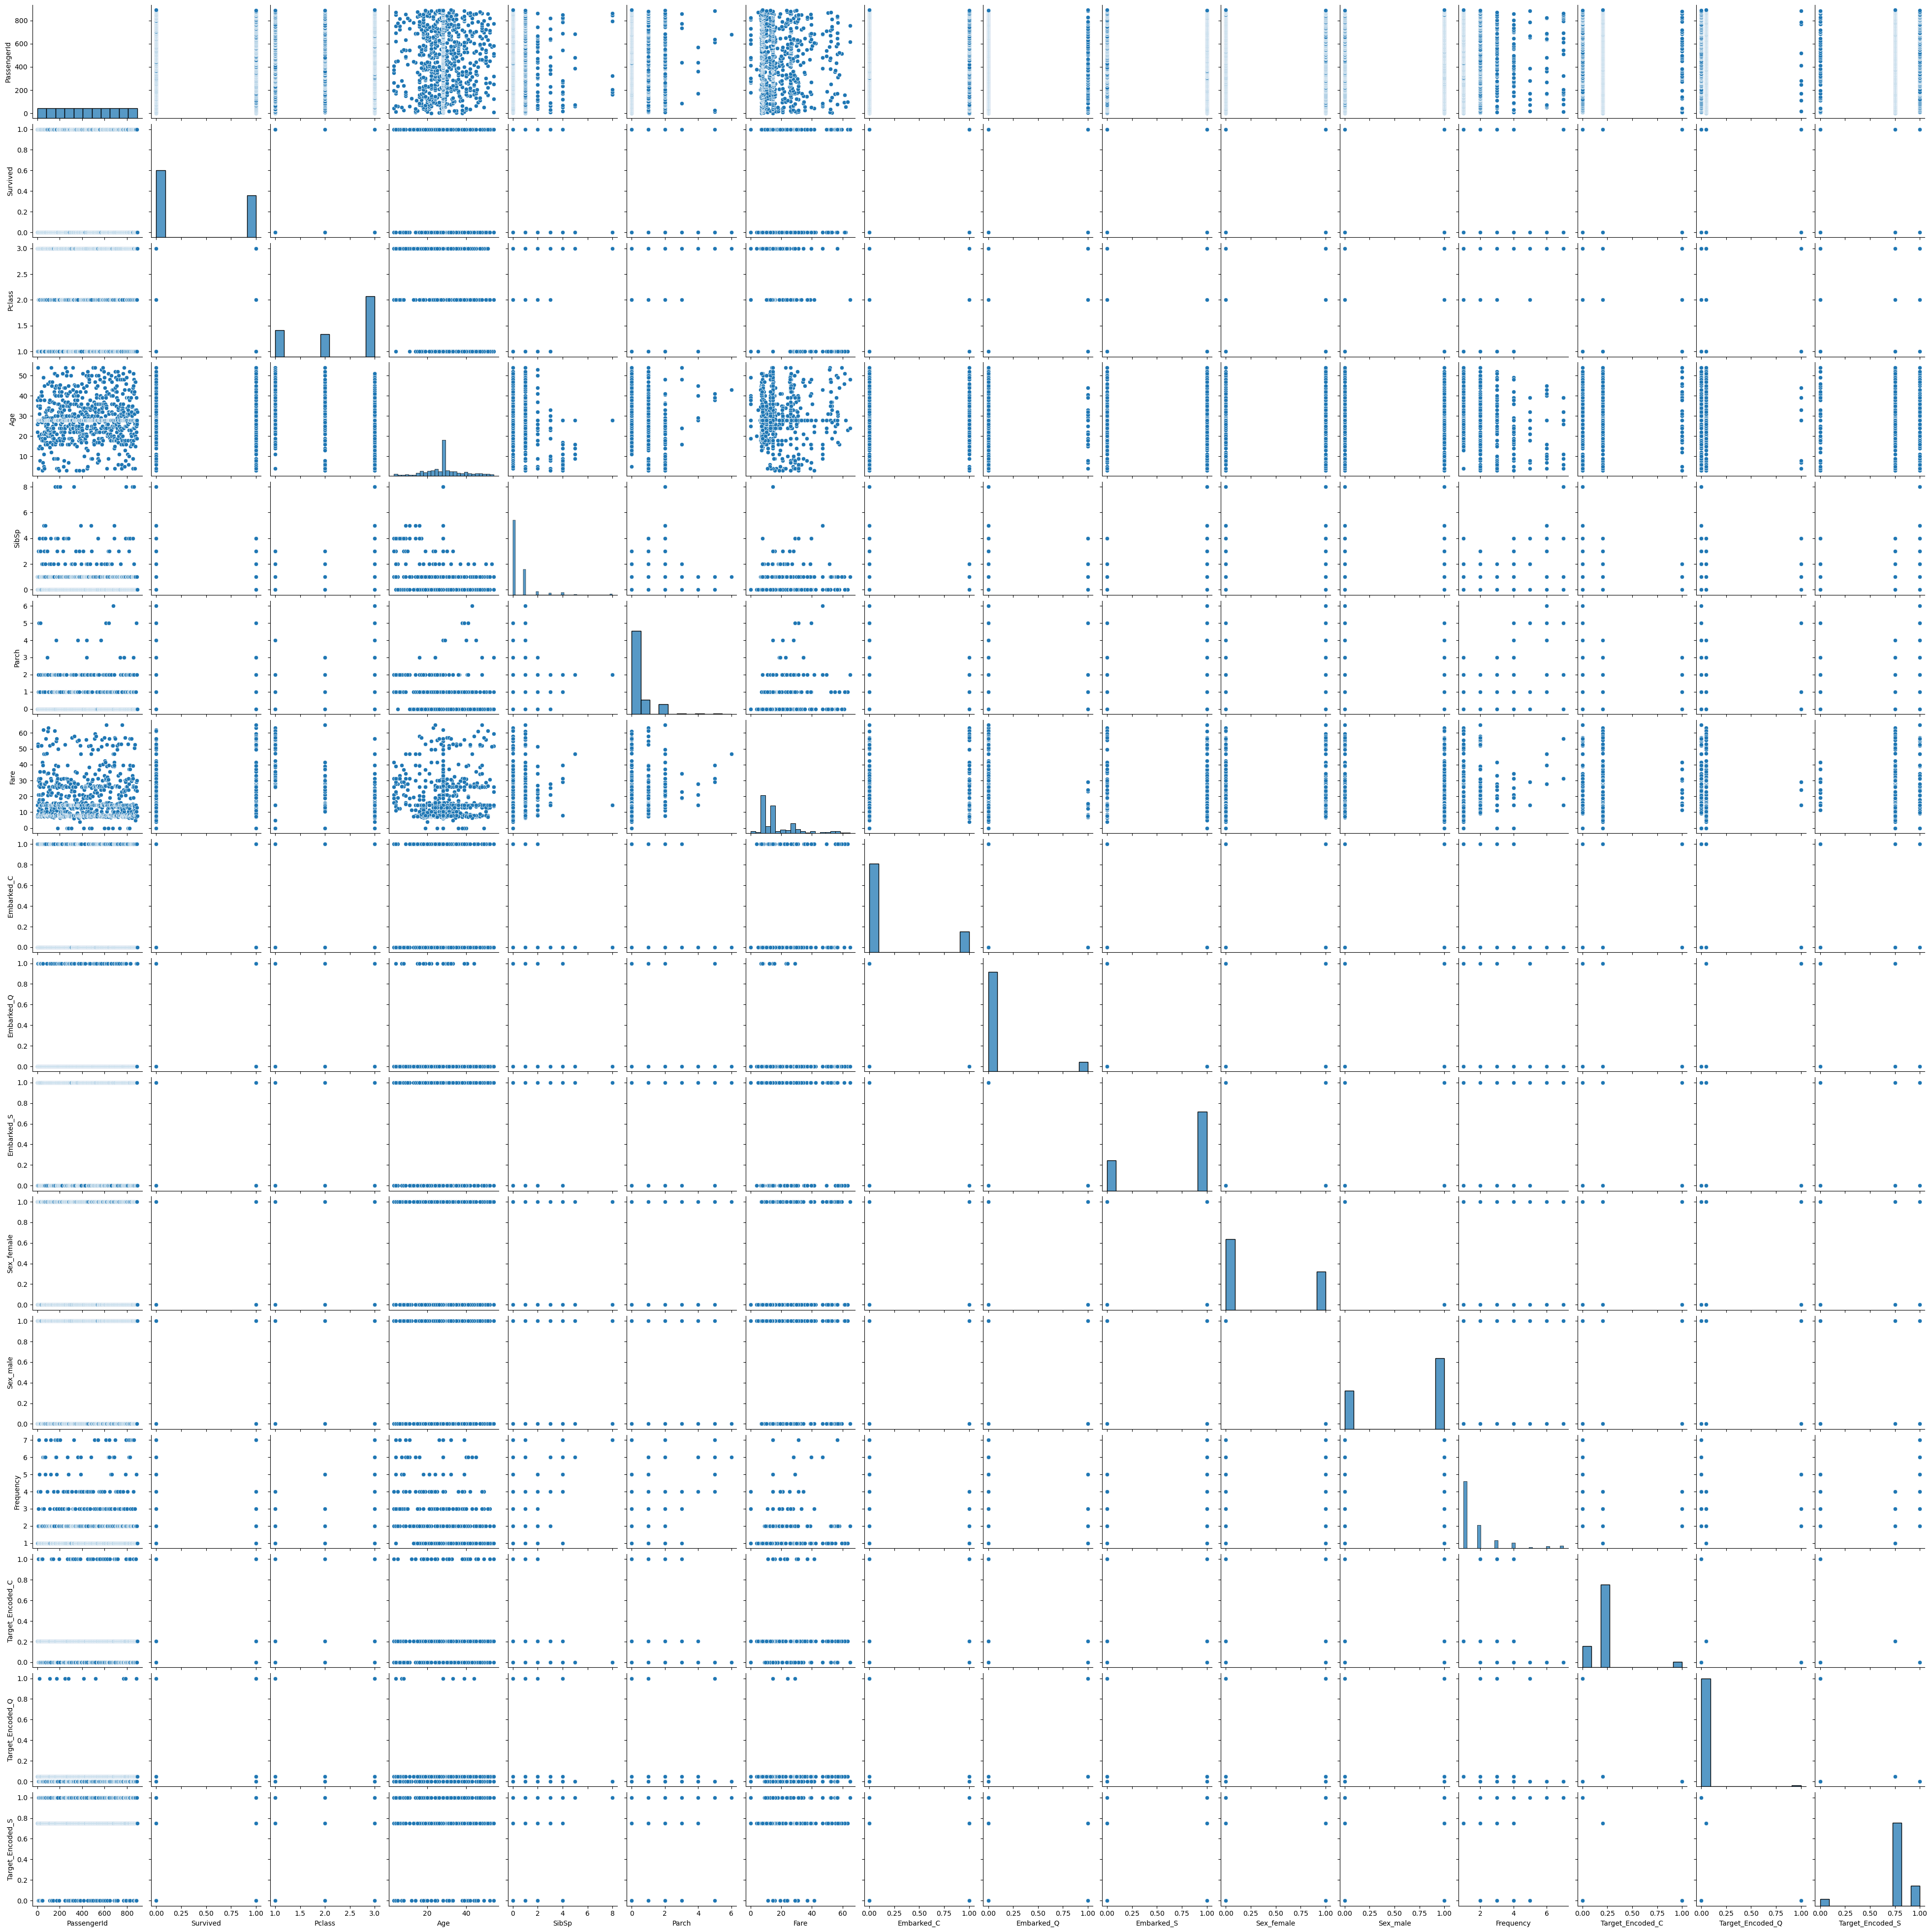

In [466]:

import seaborn as sns
pd.plotting.scatter_matrix(df_cleaned)
sns.pairplot(df_cleaned)
plt.show()

In [460]:
# Correlation analysis

corr_chart=df_cleaned.corr()
corr_chart

PassengerId  Survived    Pclass       Age     SibSp  \
PassengerId          1.000000 -0.005007 -0.035144  0.048426 -0.057527   
Survived            -0.005007  1.000000 -0.338481 -0.020426 -0.035322   
Pclass              -0.035144 -0.338481  1.000000 -0.280164  0.083081   
Age                  0.048426 -0.020426 -0.280164  1.000000 -0.175854   
SibSp               -0.057527 -0.035322  0.083081 -0.175854  1.000000   
Parch               -0.001652  0.081629  0.018443 -0.118873  0.414838   
Fare                 0.002589  0.190926 -0.433904  0.079879  0.262825   
Embarked_C          -0.001205  0.168240 -0.243292  0.017842 -0.059528   
Embarked_Q          -0.033606  0.003650  0.221009 -0.047635 -0.026354   
Embarked_S           0.022148 -0.155660  0.081720  0.011993  0.070941   
Sex_female          -0.042939  0.543351 -0.131900 -0.052151  0.114631   
Sex_male             0.042939 -0.543351  0.131900  0.052151 -0.114631   
Frequency            0.003355  0.038247 -0.002633 -0.147955  0.661622   
Target_Encoded_C    -0.007942  0.142457 -0.121417  0.029618 -0.159670   
Target_Encoded_Q    -0.015008 -0.055560  0.057459 -0.026568  0.072273   
Target_Encoded_S     0.014669 -0.105540  0.085049 -0.014656  0.113440   

                     Parch      Fare  Embarked_C  Embarked_Q  Embarked_S  \
PassengerId      -0.001652  0.002589   -0.001205   -0.033606    0.022148   
Survived          0.081629  0.190926    0.168240    0.003650   -0.155660   
Pclass            0.018443 -0.433904   -0.243292    0.221009    0.081720   
Age              -0.118873  0.079879    0.017842   -0.047635    0.011993   
SibSp             0.414838  0.262825   -0.059528   -0.026354    0.070941   
Parch             1.000000  0.293337   -0.011069   -0.081228    0.063036   
Fare              0.293337  1.000000    0.076474   -0.146928    0.026560   
Embarked_C       -0.011069  0.076474    1.000000   -0.148258   -0.778359   
Embarked_Q       -0.081228 -0.146928   -0.148258    1.000000   -0.496624   
Embarked_S        0.063036  0.026560   -0.778359   -0.496624    1.000000   
Sex_female        0.245489  0.102979    0.082853    0.074115   -0.125722   
Sex_male         -0.245489 -0.102979   -0.082853   -0.074115    0.125722   
Frequency         0.593076  0.368802   -0.023968   -0.072426    0.065626   
Target_Encoded_C -0.099658 -0.104071    0.492496   -0.041031   -0.404607   
Target_Encoded_Q -0.010972 -0.001438   -0.056495    0.368204   -0.181762   
Target_Encoded_S  0.098017  0.097496   -0.430663   -0.140513    0.464533   

                  Sex_female  Sex_male  Frequency  Target_Encoded_C  \
PassengerId        -0.042939  0.042939   0.003355         -0.007942   
Survived            0.543351 -0.543351   0.038247          0.142457   
Pclass             -0.131900  0.131900  -0.002633         -0.121417   
Age                -0.052151  0.052151  -0.147955          0.029618   
SibSp               0.114631 -0.114631   0.661622         -0.159670   
Parch               0.245489 -0.245489   0.593076         -0.099658   
Fare                0.102979 -0.102979   0.368802         -0.104071   
Embarked_C          0.082853 -0.082853  -0.023968          0.492496   
Embarked_Q          0.074115 -0.074115  -0.072426         -0.041031   
Embarked_S         -0.125722  0.125722   0.065626         -0.404607   
Sex_female          1.000000 -1.000000   0.154748          0.080518   
Sex_male           -1.000000  1.000000  -0.154748         -0.080518   
Frequency           0.154748 -0.154748   1.000000         -0.163952   
Target_Encoded_C    0.080518 -0.080518  -0.163952          1.000000   
Target_Encoded_Q   -0.046467  0.046467   0.023185         -0.111437   
Target_Encoded_S   -0.052342  0.052342   0.141243         -0.876038   

                  Target_Encoded_Q  Target_Encoded_S  
PassengerId              -0.015008          0.014669  
Survived                 -0.055560         -0.105540  
Pclass                    0.057459          0.085049  
Age                      -0.026568         -0.014656  


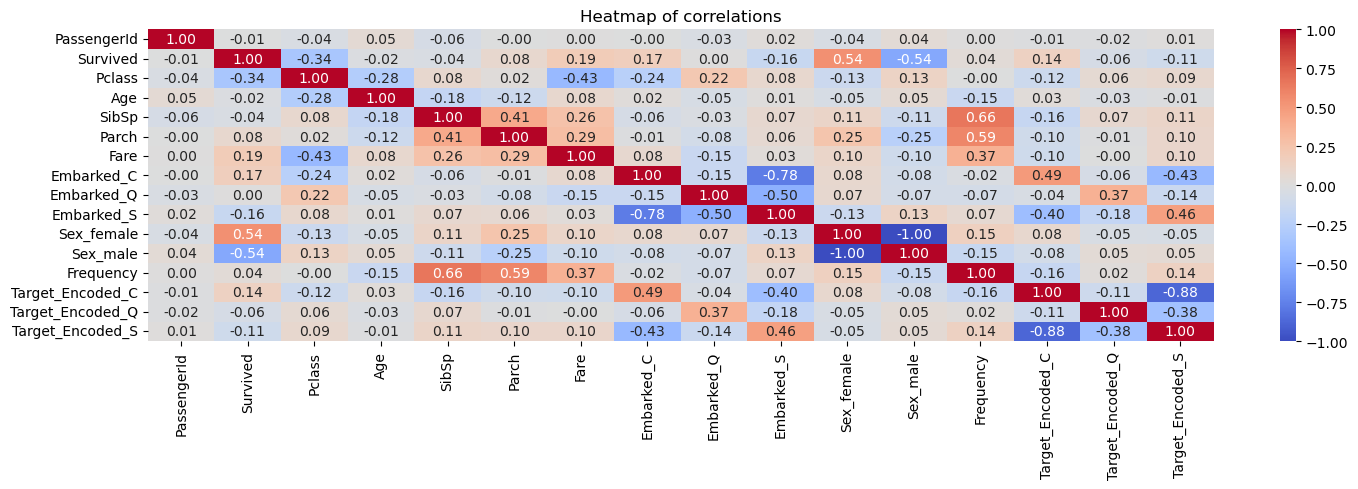

In [467]:
import seaborn as sns
plt.figure(figsize=(15, 5))
sns.heatmap(corr_chart, annot=True, cmap='coolwarm', fmt='.2f')
plt.title ('Heatmap of correlations')
plt.tight_layout()
plt.show()

In [470]:
# 'SibSp' and 'Frequency' columns show moderate postiive correlation. However, this does not seem significant as it is 0.66.

# Although 'Sex-male' and 'Sex_female' shows strong negative correlation, this does not imply any meaningful result because they belong to same column in 
# original dataset. Similarly for 'Target_Encoded_C' and 'Target_Encoded_S', but apart form this they are also target variable. Ideally target variables 
# are not considered in correlation checks.

In [472]:
# Model Building

In [744]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [480]:
df_cleaned.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  14.4542   

                                                    Embarked_C  Embarked_Q  \
Name                                                                         
Braund, Mr. Owen Harris                                      0           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1           0   

                                                    Embarked_S  Sex_female  \
Name                                                                         
Braund, Mr. Owen Harris                                      1           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           0           1   

                                                    Sex_male  Frequency  \
Name                                                                      
Braund, Mr. Owen Harris                                    1          1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...         0          1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.203704   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.203704   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.046296   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.046296   

                                                    Target_Encoded_S  
Name                                                                  
Braund, Mr. Owen Harris                                         0.75  
Cumings, Mrs. John Bradley (Florence Briggs Tha...              0.75

In [ ]:
# Rearranging the columsn so that the target columns move to the end of the dataframe

In [ ]:
columns = df.columns.tolist()
new_order = columns[:2] + columns[5:] + columns[2:5]  # First two + remaining + last three
df = df[new_order]

print(df)

In [486]:
columns= df_cleaned.columns.tolist()

In [488]:
columns

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Sex_female',
 'Sex_male',
 'Frequency',
 'Target_Encoded_C',
 'Target_Encoded_Q',
 'Target_Encoded_S']

In [532]:
new_order = columns[:7] + columns[10:] + columns[7:10]
df_cleaned_2=df_cleaned
df_cleaned_2=df_cleaned[new_order]
print (df_cleaned_2)

                                                    PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

In [534]:
df_cleaned_2

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   
Heikkinen, Miss. Laina                                   3  26.0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  35.0      1   
Allen, Mr. William Henry                                 3  35.0      0   
...                                                    ...   ...    ...   
Montvila, Rev. Juozas                                    2  27.0      0   
Graham, Miss. Margaret Edith                             1  19.0      0   
Johnston, Miss. Catherine Helen "Carrie"                 3  28.0      1   
Behr, Mr. Karl Howell                                    1  26.0      0   
Dooley, Mr. Patrick                                      3  32.0      0   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  14.4542   
Heikkinen, Miss. Laina                                  0   7.9250   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            0  53.1000   
Allen, Mr. William Henry                                0   8.0500   
...                                                   ...      ...   
Montvila, Rev. Juozas                                   0  13.0000   
Graham, Miss. Margaret Edith                            0  30.0000   
Johnston, Miss. Catherine Helen "Carrie"                2  23.4500   
Behr, Mr. Karl Howell                                   0  30.0000   
Dooley, Mr. Patrick                                     0   7.7500   

                                                    Sex_female  Sex_male  \
Name                                                                       
Braund, Mr. Owen Harris                                      0         1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1         0   
Heikkinen, Miss. Laina                                       1         0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                 1         0   
Allen, Mr. William Henry                                     0         1   
...                                                        ...       ...   
Montvila, Rev. Juozas                                        0         1   
Graham, Miss. Margaret Edith                                 1         0   
Johnston, Miss. Catherine Helen "Carrie"                     1         0   
Behr, Mr. Karl Howell                                        0         1   
Dooley, Mr. Patrick                                          0         1   

                                                    Frequency  \
Name                                                            
Braund, Mr. Owen Harris                     

In [506]:
# Model building

In [ ]:
# Logistic regression takes only one target variable. Since Embarked column has been one hot encoded as this was categorical data, 
# it's important to combine it into one numerical column. Hence using np.argmax.

In [536]:
one_hot_columns = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
df_cleaned_2['Target'] = np.argmax(df_cleaned_2[one_hot_columns].values,axis=1)

C:\Users\Smrithi\AppData\Local\Temp\ipykernel_21016\2380434079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_2['Target'] = np.argmax(df_cleaned_2[one_hot_columns].values,axis=1)


In [538]:
df_cleaned_2.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  14.4542   

                                                    Sex_female  Sex_male  \
Name                                                                       
Braund, Mr. Owen Harris                                      0         1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1         0   

                                                    Frequency  \
Name                                                            
Braund, Mr. Owen Harris                                     1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.203704   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.203704   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.046296   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.046296   

                                                    Target_Encoded_S  \
Name                                                                   
Braund, Mr. Owen Harris                                         0.75   
Cumings, Mrs. John Bradley (Florence Briggs Tha...              0.75   

                                                    Embarked_C  Embarked_Q  \
Name                                                                         
Braund, Mr. Owen Harris                                      0           0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1           0   

                                                    Embarked_S  Target  
Name                                                                    
Braund, Mr. Owen Harris                                      1       2  
Cumings, Mrs. John Bradley (Florence Briggs Tha...           0       0

In [540]:
df_cleaned_2['Target'].value_counts()

Target
2    644
0    170
1     77
Name: count, dtype: int64

In [550]:
df_cleaned_2.head(1)

PassengerId  Survived  Pclass   Age  SibSp  Parch  \
Name                                                                         
Braund, Mr. Owen Harris            1         0       3  22.0      1      0   

                         Fare  Sex_female  Sex_male  Frequency  \
Name                                                             
Braund, Mr. Owen Harris  7.25           0         1          1   

                         Target_Encoded_C  Target_Encoded_Q  Target_Encoded_S  \
Name                                                                            
Braund, Mr. Owen Harris          0.203704          0.046296              0.75   

                         Embarked_C  Embarked_Q  Embarked_S  Target  
Name                                                                 
Braund, Mr. Owen Harris           0           0           1       2

In [548]:
# Removing the 1 hot encoded columns


NameError: name 'df_cleaned_3' is not defined

In [554]:
cols_to_remove=['Embarked_C','Embarked_Q','Embarked_S']
df_cleaned_2 = df_cleaned_2.drop(columns=cols_to_remove)

In [556]:
df_cleaned_2.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  14.4542   

                                                    Sex_female  Sex_male  \
Name                                                                       
Braund, Mr. Owen Harris                                      0         1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1         0   

                                                    Frequency  \
Name                                                            
Braund, Mr. Owen Harris                                     1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.203704   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.203704   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.046296   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.046296   

                                                    Target_Encoded_S  Target  
Name                                                                          
Braund, Mr. Owen Harris                                         0.75       2  
Cumings, Mrs. John Bradley (Florence Briggs Tha...              0.75       0

# Importing test data

In [594]:
# Read test data

rf=pd.read_csv('Titanic_test.csv')

In [596]:
rf.head(2)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S

In [598]:
rf.shape

(418, 11)

In [600]:
import math

#Finding the sum of null values in the columns

In [602]:
rf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [604]:
# Datatypes of columns

In [606]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [608]:
rf.Name.value_counts()

Name
Kelly, Mr. James               1
Carr, Miss. Jeannie            1
Dennis, Mr. William            1
Rosblom, Miss. Salli Helena    1
Touma, Miss. Maria Youssef     1
                              ..
Zakarian, Mr. Mapriededer      1
Carlsson, Mr. Carl Robert      1
Dintcheff, Mr. Valtcho         1
Thomas, Mr. Charles P          1
Peter, Master. Michael J       1
Name: count, Length: 418, dtype: int64

In [610]:
# Since 'name' column is categorical and with unique values, this is changed into index

rf_new=rf.set_index('Name')
rf_new

PassengerId  Pclass     Sex  \
Name                                                                        
Kelly, Mr. James                                      892       3    male   
Wilkes, Mrs. James (Ellen Needs)                      893       3  female   
Myles, Mr. Thomas Francis                             894       2    male   
Wirz, Mr. Albert                                      895       3    male   
Hirvonen, Mrs. Alexander (Helga E Lindqvist)          896       3  female   
...                                                   ...     ...     ...   
Spector, Mr. Woolf                                   1305       3    male   
Oliva y Ocana, Dona. Fermina                         1306       1  female   
Saether, Mr. Simon Sivertsen                         1307       3    male   
Ware, Mr. Frederick                                  1308       3    male   
Peter, Master. Michael J                             1309       3    male   

                                               Age  SibSp  Parch  \
Name                                                               
Kelly, Mr. James                              34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)              47.0      1      0   
Myles, Mr. Thomas Francis                     62.0      0      0   
Wirz, Mr. Albert                              27.0      0      0   
Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1      1   
...                                            ...    ...    ...   
Spector, Mr. Woolf                             NaN      0      0   
Oliva y Ocana, Dona. Fermina                  39.0      0      0   
Saether, Mr. Simon Sivertsen                  38.5      0      0   
Ware, Mr. Frederick                            NaN      0      0   
Peter, Master. Michael J                       NaN      1      1   

                                                          Ticket      Fare  \
Name                                                                         
Kelly, Mr. James                                          330911    7.8292   
Wilkes, Mrs. James (Ellen Needs)                          363272    7.0000   
Myles, Mr. Thomas Francis                                 240276    9.6875   
Wirz, Mr. Albert                                          315154    8.6625   
Hirvonen, Mrs. Alexander (Helga E Lindqvist)             3101298   12.2875   
...                                                          ...       ...   
Spector, Mr. Woolf                                     A.5. 3236    8.0500   
Oliva y Ocana, Dona. Fermina                            PC 17758  108.9000   
Saether, Mr. Simon Sivertsen                  SOTON/O.Q. 3101262    7.2500   
Ware, Mr. Frederick                                       359309    8.0500   
Peter, Master. Michael J                                    2668   22.3583   

                                             Cabin Embarked  
Name                                                         
Kelly, Mr. James                               NaN        Q  
Wilkes, Mrs. James (Ellen Needs)               NaN        S  
Myles, Mr. Thomas Francis                      NaN        Q  
Wirz, Mr. Albert                               NaN        S  
Hirvonen, Mrs. Alexander (Helga E Lindqvist)   NaN        S  
...                                            ...      ...  
Spector, Mr. Woolf                             NaN        S  
Oliva y Ocana, Dona. Fermina                  C105        C  
Saether, Mr. Simon Sivertsen                   NaN        S  
Ware, Mr. Frederick                            NaN        S  
Peter, Master. Michael J                       NaN        C  

[418 rows x 10 columns]

In [612]:
rf_new.Sex.value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [614]:
rf_new[rf_new.duplicated()]

Empty DataFrame
Columns: [PassengerId, Pclass, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

In [616]:
 (327/418 )* 100

78.22966507177034

In [618]:
# Cabin column can be removed as it consists of null values more than 40%

In [620]:
rf_new=rf_new.drop(['Cabin'],axis=1)

In [622]:
rf_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, Kelly, Mr. James to Peter, Master. Michael J
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 48.8+ KB


In [624]:
# One hot encoding of 'Sex' and 'Embarked' columns

In [626]:
rf_new_1=pd.get_dummies(rf_new,columns=['Sex'])

In [628]:
rf_new_1.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                  Ticket    Fare Embarked  Sex_female  \
Name                                                                    
Kelly, Mr. James                  330911  7.8292        Q       False   
Wilkes, Mrs. James (Ellen Needs)  363272  7.0000        S        True   

                                  Sex_male  
Name                                        
Kelly, Mr. James                      True  
Wilkes, Mrs. James (Ellen Needs)     False

In [630]:
rf_new_1[['Sex_female','Sex_male']]=rf_new_1[['Sex_female','Sex_male']].astype(int)

In [632]:
rf_new_1.head(1) #Conversion to numerical

PassengerId  Pclass   Age  SibSp  Parch  Ticket    Fare  \
Name                                                                        
Kelly, Mr. James          892       3  34.5      0      0  330911  7.8292   

                 Embarked  Sex_female  Sex_male  
Name                                             
Kelly, Mr. James        Q           0         1

In [634]:
rf_new_1=pd.get_dummies(rf_new_1,columns=['Embarked'])

In [636]:
rf_new_1.head(1)

PassengerId  Pclass   Age  SibSp  Parch  Ticket    Fare  \
Name                                                                        
Kelly, Mr. James          892       3  34.5      0      0  330911  7.8292   

                  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  
Name                                                                        
Kelly, Mr. James           0         1       False        True       False

In [638]:
# Conversion to numerical

rf_new_1[['Embarked_C','Embarked_Q','Embarked_S']]=rf_new_1[['Embarked_C','Embarked_Q','Embarked_S']].astype(int)

In [640]:
rf_new_1.head(3)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   
Myles, Mr. Thomas Francis                 894       2  62.0      0      0   

                                  Ticket    Fare  Sex_female  Sex_male  \
Name                                                                     
Kelly, Mr. James                  330911  7.8292           0         1   
Wilkes, Mrs. James (Ellen Needs)  363272  7.0000           1         0   
Myles, Mr. Thomas Francis         240276  9.6875           0         1   

                                  Embarked_C  Embarked_Q  Embarked_S  
Name                                                                  
Kelly, Mr. James                           0           1           0  
Wilkes, Mrs. James (Ellen Needs)           0           0           1  
Myles, Mr. Thomas Francis                  0           1           0

In [642]:
rf_new_1['Ticket'].value_counts

<bound method IndexOpsMixin.value_counts of Name
Kelly, Mr. James                                            330911
Wilkes, Mrs. James (Ellen Needs)                            363272
Myles, Mr. Thomas Francis                                   240276
Wirz, Mr. Albert                                            315154
Hirvonen, Mrs. Alexander (Helga E Lindqvist)               3101298
                                                       ...        
Spector, Mr. Woolf                                       A.5. 3236
Oliva y Ocana, Dona. Fermina                              PC 17758
Saether, Mr. Simon Sivertsen                    SOTON/O.Q. 3101262
Ware, Mr. Frederick                                         359309
Peter, Master. Michael J                                      2668
Name: Ticket, Length: 418, dtype: object>

In [644]:
rf_new_1['Ticket'].nunique

<bound method IndexOpsMixin.nunique of Name
Kelly, Mr. James                                            330911
Wilkes, Mrs. James (Ellen Needs)                            363272
Myles, Mr. Thomas Francis                                   240276
Wirz, Mr. Albert                                            315154
Hirvonen, Mrs. Alexander (Helga E Lindqvist)               3101298
                                                       ...        
Spector, Mr. Woolf                                       A.5. 3236
Oliva y Ocana, Dona. Fermina                              PC 17758
Saether, Mr. Simon Sivertsen                    SOTON/O.Q. 3101262
Ware, Mr. Frederick                                         359309
Peter, Master. Michael J                                      2668
Name: Ticket, Length: 418, dtype: object>

In [646]:
# Column ' Ticket' has many unique values, hence high cardinality with object datatype.
# Data conversion using combined frequency encoding and kfold target encoding

In [648]:
from sklearn.model_selection import KFold

In [650]:
# Frequency encoding

In [652]:
frequency_encoding_test= rf_new_1['Ticket'].value_counts().to_dict()
rf_new_1['Frequency']=rf_new_1['Ticket'].map(frequency_encoding_test)

In [654]:
rf_new_1.head(1)

PassengerId  Pclass   Age  SibSp  Parch  Ticket    Fare  \
Name                                                                        
Kelly, Mr. James          892       3  34.5      0      0  330911  7.8292   

                  Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S  \
Name                                                                         
Kelly, Mr. James           0         1           0           1           0   

                  Frequency  
Name                         
Kelly, Mr. James          1

In [656]:
# Initialize K-Fold Target Encoding.
# There are 3 target variables due to one hot encoding.

In [658]:
kf_1 = KFold(n_splits=2, shuffle=True, random_state = 42)
# Initialize arrays to store target-encoded values for each target column
target_encoded_C = np.zeros(len(rf_new_1))
target_encoded_Q = np.zeros(len(rf_new_1))
target_encoded_S = np.zeros(len(rf_new_1))

In [660]:
for train_idx, val_idx in kf_1.split(rf_new_1):
    train, val = rf_new_1.iloc[train_idx], rf_new_1.iloc[val_idx]

# Compute mean target for each one-hot encoded target column
    mean_target_C = train.groupby('Ticket')['Embarked_C'].mean()
    mean_target_Q = train.groupby('Ticket')['Embarked_Q'].mean()
    mean_target_S = train.groupby('Ticket')['Embarked_S'].mean()

# Map the mean target values to the validation set
    target_encoded_C[val_idx] = val['Ticket'].map(mean_target_C)
    target_encoded_Q[val_idx] = val['Ticket'].map(mean_target_Q)
    target_encoded_S[val_idx] = val['Ticket'].map(mean_target_S)

# Add encoded columns back to the dataframe

rf_new_1['Target_Encoded_C'] = target_encoded_C
rf_new_1['Target_Encoded_Q'] = target_encoded_Q
rf_new_1['Target_Encoded_S'] = target_encoded_S

rf_new_1.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                  Ticket    Fare  Sex_female  Sex_male  \
Name                                                                     
Kelly, Mr. James                  330911  7.8292           0         1   
Wilkes, Mrs. James (Ellen Needs)  363272  7.0000           1         0   

                                  Embarked_C  Embarked_Q  Embarked_S  \
Name                                                                   
Kelly, Mr. James                           0           1           0   
Wilkes, Mrs. James (Ellen Needs)           0           0           1   

                                  Frequency  Target_Encoded_C  \
Name                                                            
Kelly, Mr. James                          1               NaN   
Wilkes, Mrs. James (Ellen Needs)          1               NaN   

                                  Target_Encoded_Q  Target_Encoded_S  
Name                                                                  
Kelly, Mr. James                               NaN               NaN  
Wilkes, Mrs. James (Ellen Needs)               NaN               NaN

In [662]:
mean_value_1 = rf_new_1['Target_Encoded_C'].mean()
print (mean_value_1)
mean_value_2 = rf_new_1['Target_Encoded_Q'].mean()
print (mean_value_2)
mean_value_3 = rf_new_1['Target_Encoded_S'].mean()
print (mean_value_3)

0.38095238095238093
0.0
0.6190476190476191


In [664]:
rf_new_1['Target_Encoded_Q'].value_counts()

Target_Encoded_Q
0.0    63
Name: count, dtype: int64

In [666]:
rf_new_1['Target_Encoded_C'].value_counts()

Target_Encoded_C
0.0    39
1.0    24
Name: count, dtype: int64

In [668]:
rf_new_1['Target_Encoded_S'].value_counts()

Target_Encoded_S
1.0    39
0.0    24
Name: count, dtype: int64

In [673]:
rf_new_1['Target_Encoded_Q'].nunique

<bound method IndexOpsMixin.nunique of Name
Kelly, Mr. James                               NaN
Wilkes, Mrs. James (Ellen Needs)               NaN
Myles, Mr. Thomas Francis                      NaN
Wirz, Mr. Albert                               NaN
Hirvonen, Mrs. Alexander (Helga E Lindqvist)   NaN
                                                ..
Spector, Mr. Woolf                             NaN
Oliva y Ocana, Dona. Fermina                   NaN
Saether, Mr. Simon Sivertsen                   NaN
Ware, Mr. Frederick                            NaN
Peter, Master. Michael J                       NaN
Name: Target_Encoded_Q, Length: 418, dtype: float64>

In [680]:
rf_new_1['Target_Encoded_Q'].isnull().sum()

355

In [682]:
# Although there are missing values, since this is test data, null values are not treated, 
# in order to avoid biasness.

In [684]:
rf_new_1.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                  Ticket    Fare  Sex_female  Sex_male  \
Name                                                                     
Kelly, Mr. James                  330911  7.8292           0         1   
Wilkes, Mrs. James (Ellen Needs)  363272  7.0000           1         0   

                                  Embarked_C  Embarked_Q  Embarked_S  \
Name                                                                   
Kelly, Mr. James                           0           1           0   
Wilkes, Mrs. James (Ellen Needs)           0           0           1   

                                  Frequency  Target_Encoded_C  \
Name                                                            
Kelly, Mr. James                          1               NaN   
Wilkes, Mrs. James (Ellen Needs)          1               NaN   

                                  Target_Encoded_Q  Target_Encoded_S  
Name                                                                  
Kelly, Mr. James                               NaN               NaN  
Wilkes, Mrs. James (Ellen Needs)               NaN               NaN

In [686]:
# Removing 'Ticket' column, because there are frequency and k fold columns representing the same.

In [688]:
rf_new_2=rf_new_1
rf_new_2 = rf_new_2.drop(['Ticket'], axis=1)


In [690]:
rf_new_2.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                    Fare  Sex_female  Sex_male  Embarked_C  \
Name                                                                         
Kelly, Mr. James                  7.8292           0         1           0   
Wilkes, Mrs. James (Ellen Needs)  7.0000           1         0           0   

                                  Embarked_Q  Embarked_S  Frequency  \
Name                                                                  
Kelly, Mr. James                           1           0          1   
Wilkes, Mrs. James (Ellen Needs)           0           1          1   

                                  Target_Encoded_C  Target_Encoded_Q  \
Name                                                                   
Kelly, Mr. James                               NaN               NaN   
Wilkes, Mrs. James (Ellen Needs)               NaN               NaN   

                                  Target_Encoded_S  
Name                                                
Kelly, Mr. James                               NaN  
Wilkes, Mrs. James (Ellen Needs)               NaN

In [692]:
rf_new_2.shape

(418, 15)

In [694]:
# Combining 'Embarked_C', 'Embarked_Q' and 'Embarked_S' into one column as logistic regression accepts only one target column

In [696]:
one_hot_columns_test = ['Embarked_C', 'Embarked_Q', 'Embarked_S']
rf_new_2['Target'] = np.argmax(rf_new_2[one_hot_columns].values,axis=1)

In [698]:
rf_new_2.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                    Fare  Sex_female  Sex_male  Embarked_C  \
Name                                                                         
Kelly, Mr. James                  7.8292           0         1           0   
Wilkes, Mrs. James (Ellen Needs)  7.0000           1         0           0   

                                  Embarked_Q  Embarked_S  Frequency  \
Name                                                                  
Kelly, Mr. James                           1           0          1   
Wilkes, Mrs. James (Ellen Needs)           0           1          1   

                                  Target_Encoded_C  Target_Encoded_Q  \
Name                                                                   
Kelly, Mr. James                               NaN               NaN   
Wilkes, Mrs. James (Ellen Needs)               NaN               NaN   

                                  Target_Encoded_S  Target  
Name                                                        
Kelly, Mr. James                               NaN       1  
Wilkes, Mrs. James (Ellen Needs)               NaN       2

In [702]:
df_cleaned_2.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  14.4542   

                                                    Sex_female  Sex_male  \
Name                                                                       
Braund, Mr. Owen Harris                                      0         1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1         0   

                                                    Frequency  \
Name                                                            
Braund, Mr. Owen Harris                                     1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.203704   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.203704   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.046296   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.046296   

                                                    Target_Encoded_S  Target  
Name                                                                          
Braund, Mr. Owen Harris                                         0.75       2  
Cumings, Mrs. John Bradley (Florence Briggs Tha...              0.75       0

In [704]:

cols_to_remove=['Embarked_C','Embarked_Q','Embarked_S']
rf_new_2 = rf_new_2.drop(columns=cols_to_remove)

In [710]:
rf_new_2.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                    Fare  Sex_female  Sex_male  Frequency  \
Name                                                                        
Kelly, Mr. James                  7.8292           0         1          1   
Wilkes, Mrs. James (Ellen Needs)  7.0000           1         0          1   

                                  Target_Encoded_C  Target_Encoded_Q  \
Name                                                                   
Kelly, Mr. James                               NaN               NaN   
Wilkes, Mrs. James (Ellen Needs)               NaN               NaN   

                                  Target_Encoded_S  Target  
Name                                                        
Kelly, Mr. James                               NaN       1  
Wilkes, Mrs. James (Ellen Needs)               NaN       2

In [716]:
rf_new_2.shape

(418, 13)

In [718]:
df_cleaned_2.shape

(891, 14)

# Model building

In [723]:
# Dividing our data into input and output variables

In [ ]:
# Training data

In [725]:
X = df_cleaned_2.iloc[:,:-1]
X


PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   
Heikkinen, Miss. Laina                                        3         1   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                  4         1   
Allen, Mr. William Henry                                      5         0   
...                                                         ...       ...   
Montvila, Rev. Juozas                                       887         0   
Graham, Miss. Margaret Edith                                888         1   
Johnston, Miss. Catherine Helen "Carrie"                    889         0   
Behr, Mr. Karl Howell                                       890         1   
Dooley, Mr. Patrick                                         891         0   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   
Heikkinen, Miss. Laina                                   3  26.0      0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)             1  35.0      1   
Allen, Mr. William Henry                                 3  35.0      0   
...                                                    ...   ...    ...   
Montvila, Rev. Juozas                                    2  27.0      0   
Graham, Miss. Margaret Edith                             1  19.0      0   
Johnston, Miss. Catherine Helen "Carrie"                 3  28.0      1   
Behr, Mr. Karl Howell                                    1  26.0      0   
Dooley, Mr. Patrick                                      3  32.0      0   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  14.4542   
Heikkinen, Miss. Laina                                  0   7.9250   
Futrelle, Mrs. Jacques Heath (Lily May Peel)            0  53.1000   
Allen, Mr. William Henry                                0   8.0500   
...                                                   ...      ...   
Montvila, Rev. Juozas                                   0  13.0000   
Graham, Miss. Margaret Edith                            0  30.0000   
Johnston, Miss. Catherine Helen "Carrie"                2  23.4500   
Behr, Mr. Karl Howell                                   0  30.0000   
Dooley, Mr. Patrick                                     0   7.7500   

                                                    Sex_female  Sex_male  \
Name                                                                       
Braund, Mr. Owen Harris                                      0         1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1         0   
Heikkinen, Miss. Laina                                       1         0   
Futrelle, Mrs. Jacques Heath (Lily May Peel)                 1         0   
Allen, Mr. William Henry                                     0         1   
...                                                        ...       ...   
Montvila, Rev. Juozas                                        0         1   
Graham, Miss. Margaret Edith                                 1         0   
Johnston, Miss. Catherine Helen "Carrie"                     1         0   
Behr, Mr. Karl Howell                                        0         1   
Dooley, Mr. Patrick                                          0         1   

                                                    Frequency  \
Name                                                            
Braund, Mr. Owen Harris                     

In [727]:
Y = df_cleaned_2.iloc[:,13:14]
Y


Target
Name                                                      
Braund, Mr. Owen Harris                                  2
Cumings, Mrs. John Bradley (Florence Briggs Tha...       0
Heikkinen, Miss. Laina                                   2
Futrelle, Mrs. Jacques Heath (Lily May Peel)             2
Allen, Mr. William Henry                                 2
...                                                    ...
Montvila, Rev. Juozas                                    2
Graham, Miss. Margaret Edith                             2
Johnston, Miss. Catherine Helen "Carrie"                 2
Behr, Mr. Karl Howell                                    0
Dooley, Mr. Patrick                                      1

[891 rows x 1 columns]

In [ ]:
# Test data X and Y

In [733]:
X_test = rf_new_2.iloc[:,:-1]
X_test.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                    Fare  Sex_female  Sex_male  Frequency  \
Name                                                                        
Kelly, Mr. James                  7.8292           0         1          1   
Wilkes, Mrs. James (Ellen Needs)  7.0000           1         0          1   

                                  Target_Encoded_C  Target_Encoded_Q  \
Name                                                                   
Kelly, Mr. James                               NaN               NaN   
Wilkes, Mrs. James (Ellen Needs)               NaN               NaN   

                                  Target_Encoded_S  
Name                                                
Kelly, Mr. James                               NaN  
Wilkes, Mrs. James (Ellen Needs)               NaN

In [ ]:
# Model building

In [ ]:
# Initialize and train the model

In [740]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Smrithi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smrithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Making predictions

In [746]:
predictions=classifier.predict(X_test)
print ("Predicted Classes:", predictions)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Survived


In [750]:
rf_new_2.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                    Fare  Sex_female  Sex_male  Frequency  \
Name                                                                        
Kelly, Mr. James                  7.8292           0         1          1   
Wilkes, Mrs. James (Ellen Needs)  7.0000           1         0          1   

                                  Target_Encoded_C  Target_Encoded_Q  \
Name                                                                   
Kelly, Mr. James                               NaN               NaN   
Wilkes, Mrs. James (Ellen Needs)               NaN               NaN   

                                  Target_Encoded_S  Target  
Name                                                        
Kelly, Mr. James                               NaN       1  
Wilkes, Mrs. James (Ellen Needs)               NaN       2

In [754]:
df_cleaned_2.head(2)

PassengerId  Survived  \
Name                                                                        
Braund, Mr. Owen Harris                                       1         0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2         1   

                                                    Pclass   Age  SibSp  \
Name                                                                      
Braund, Mr. Owen Harris                                  3  22.0      1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...       1  38.0      1   

                                                    Parch     Fare  \
Name                                                                 
Braund, Mr. Owen Harris                                 0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      0  14.4542   

                                                    Sex_female  Sex_male  \
Name                                                                       
Braund, Mr. Owen Harris                                      0         1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1         0   

                                                    Frequency  \
Name                                                            
Braund, Mr. Owen Harris                                     1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.203704   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.203704   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.046296   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.046296   

                                                    Target_Encoded_S  Target  
Name                                                                          
Braund, Mr. Owen Harris                                         0.75       2  
Cumings, Mrs. John Bradley (Florence Briggs Tha...              0.75       0

In [ ]:
# Removing column'Survived' from dataset used for training

In [762]:
df_cleaned_2 = df_cleaned_2.drop(['Survived'],axis=1)


In [764]:
df_cleaned_2.head(2)

PassengerId  Pclass   Age  \
Name                                                                            
Braund, Mr. Owen Harris                                       1       3  22.0   
Cumings, Mrs. John Bradley (Florence Briggs Tha...            2       1  38.0   

                                                    SibSp  Parch     Fare  \
Name                                                                        
Braund, Mr. Owen Harris                                 1      0   7.2500   
Cumings, Mrs. John Bradley (Florence Briggs Tha...      1      0  14.4542   

                                                    Sex_female  Sex_male  \
Name                                                                       
Braund, Mr. Owen Harris                                      0         1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...           1         0   

                                                    Frequency  \
Name                                                            
Braund, Mr. Owen Harris                                     1   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          1   

                                                    Target_Encoded_C  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.203704   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.203704   

                                                    Target_Encoded_Q  \
Name                                                                   
Braund, Mr. Owen Harris                                     0.046296   
Cumings, Mrs. John Bradley (Florence Briggs Tha...          0.046296   

                                                    Target_Encoded_S  Target  
Name                                                                          
Braund, Mr. Owen Harris                                         0.75       2  
Cumings, Mrs. John Bradley (Florence Briggs Tha...              0.75       0

In [776]:
X = df_cleaned_2.iloc[:,:-1]
Y = df_cleaned_2.iloc[:,12:13]
# X

In [ ]:
# Reinitialize and model building

In [778]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\Smrithi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Smrithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [780]:
# Making predictions

predictions=classifier.predict(X_test)
print ("Predicted Classes:", predictions)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Removing missing values from test dataset

In [782]:
rf_new_2.isnull().sum()

PassengerId           0
Pclass                0
Age                  86
SibSp                 0
Parch                 0
Fare                  1
Sex_female            0
Sex_male              0
Frequency             0
Target_Encoded_C    355
Target_Encoded_Q    355
Target_Encoded_S    355
Target                0
dtype: int64

In [ ]:
# For the column 'Age' data imputation can be performed with median values.
# For Target_Encoded columns, by default NAs are given 0.5 since the only known values are 0 and 1.

In [786]:
mean_value_a = rf_new_2['Target_Encoded_C'].mean()
print (mean_value_a)
mean_value_b = rf_new_2['Target_Encoded_Q'].mean()
print (mean_value_b)
mean_value_c = rf_new_2['Target_Encoded_S'].mean()
print (mean_value_3)

0.38095238095238093
0.0
0.6190476190476191


In [788]:
rf_new_2['Target_Encoded_C'] = rf_new_2['Target_Encoded_C'].fillna(mean_value_a)
rf_new_2['Target_Encoded_Q'] = rf_new_2['Target_Encoded_Q'].fillna(mean_value_b)
rf_new_2['Target_Encoded_S'] = rf_new_2['Target_Encoded_S'].fillna(mean_value_c)

In [790]:
rf_new_2.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                    Fare  Sex_female  Sex_male  Frequency  \
Name                                                                        
Kelly, Mr. James                  7.8292           0         1          1   
Wilkes, Mrs. James (Ellen Needs)  7.0000           1         0          1   

                                  Target_Encoded_C  Target_Encoded_Q  \
Name                                                                   
Kelly, Mr. James                          0.380952               0.0   
Wilkes, Mrs. James (Ellen Needs)          0.380952               0.0   

                                  Target_Encoded_S  Target  
Name                                                        
Kelly, Mr. James                          0.619048       1  
Wilkes, Mrs. James (Ellen Needs)          0.619048       2

In [794]:
mean_value_age = rf_new_2['Age'].mean()
print (mean_value_age)

30.272590361445783


In [796]:
rf_new_2['Age']=rf_new_2['Age'].fillna(mean_value_age)

In [798]:
rf_new_2.isnull().sum()

PassengerId         0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                1
Sex_female          0
Sex_male            0
Frequency           0
Target_Encoded_C    0
Target_Encoded_Q    0
Target_Encoded_S    0
Target              0
dtype: int64

In [800]:
mean_value_Fare = rf_new_2['Fare'].mean()
print (mean_value_Fare)

35.627188489208635


In [802]:
rf_new_2['Fare']=rf_new_2['Fare'].fillna(mean_value_Fare)

In [804]:
rf_new_2.isnull().sum()

PassengerId         0
Pclass              0
Age                 0
SibSp               0
Parch               0
Fare                0
Sex_female          0
Sex_male            0
Frequency           0
Target_Encoded_C    0
Target_Encoded_Q    0
Target_Encoded_S    0
Target              0
dtype: int64

In [806]:
rf_new_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, Kelly, Mr. James to Peter, Master. Michael J
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       418 non-null    int64  
 1   Pclass            418 non-null    int64  
 2   Age               418 non-null    float64
 3   SibSp             418 non-null    int64  
 4   Parch             418 non-null    int64  
 5   Fare              418 non-null    float64
 6   Sex_female        418 non-null    int32  
 7   Sex_male          418 non-null    int32  
 8   Frequency         418 non-null    int64  
 9   Target_Encoded_C  418 non-null    float64
 10  Target_Encoded_Q  418 non-null    float64
 11  Target_Encoded_S  418 non-null    float64
 12  Target            418 non-null    int64  
dtypes: float64(5), int32(2), int64(6)
memory usage: 58.6+ KB


In [ ]:
# Removed all NAs. Reinitializing the X test dataset.

In [808]:
X_test = rf_new_2.iloc[:,:-1]
X_test.head(2)

PassengerId  Pclass   Age  SibSp  Parch  \
Name                                                                        
Kelly, Mr. James                          892       3  34.5      0      0   
Wilkes, Mrs. James (Ellen Needs)          893       3  47.0      1      0   

                                    Fare  Sex_female  Sex_male  Frequency  \
Name                                                                        
Kelly, Mr. James                  7.8292           0         1          1   
Wilkes, Mrs. James (Ellen Needs)  7.0000           1         0          1   

                                  Target_Encoded_C  Target_Encoded_Q  \
Name                                                                   
Kelly, Mr. James                          0.380952               0.0   
Wilkes, Mrs. James (Ellen Needs)          0.380952               0.0   

                                  Target_Encoded_S  
Name                                                
Kelly, Mr. James                          0.619048  
Wilkes, Mrs. James (Ellen Needs)          0.619048

In [810]:
# Making predictions

predictions=classifier.predict(X_test)
print ("Predicted Classes:", predictions)

Predicted Classes: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 2 2 2 2 0 2 2 2 2
 0 2 2 2 2 2 2 0 2 2 2]


In [812]:
len(predictions)

418

In [814]:
Y_test_actual = rf_new_2.iloc[:,12:13]
Y_test_actual

Target
Name                                                
Kelly, Mr. James                                   1
Wilkes, Mrs. James (Ellen Needs)                   2
Myles, Mr. Thomas Francis                          1
Wirz, Mr. Albert                                   2
Hirvonen, Mrs. Alexander (Helga E Lindqvist)       2
...                                              ...
Spector, Mr. Woolf                                 2
Oliva y Ocana, Dona. Fermina                       0
Saether, Mr. Simon Sivertsen                       2
Ware, Mr. Frederick                                2
Peter, Master. Michael J                           0

[418 rows x 1 columns]

In [824]:
Y_test_actual_r = np.ravel(Y_test_actual)

In [826]:
predictions_r=np.ravel(predictions)

In [828]:
y_pred_df = pd.DataFrame({'Actual' : Y_test_actual_r,
                         'Predicted_value' : predictions_r})

In [830]:
y_pred_df

Actual  Predicted_value
0         1                2
1         2                2
2         1                2
3         2                2
4         2                2
..      ...              ...
413       2                2
414       0                0
415       2                2
416       2                2
417       0                2

[418 rows x 2 columns]

In [836]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test_actual_r,predictions_r)
print (confusion_matrix)

[[ 33   0  69]
 [  0   0  46]
 [ 11   0 259]]


In [838]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_actual_r,predictions_r))

              precision    recall  f1-score   support

           0       0.75      0.32      0.45       102
           1       0.00      0.00      0.00        46
           2       0.69      0.96      0.80       270

    accuracy                           0.70       418
   macro avg       0.48      0.43      0.42       418
weighted avg       0.63      0.70      0.63       418



C:\Users\Smrithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Smrithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Smrithi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# ROC Curve
#classifier.predict_proba (X)

In [844]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test_actual_r, classifier.predict_proba(X_test)[:,1])
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresholds)
auc = roc_auc_score(Y_test_actual_r, predictions_r)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

ValueError: multiclass format is not supported

In [ ]:
    STANDARDIZATION

In [ ]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_cleaned.values

In [ ]:
d_value = df_cleaned.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(d_value)

# Transformed data

set_printoptions(precision=3)
print (rescaledX[0:5,:]) # First 5 rows and all columns of the normalized data will be printed

In [ ]:
rescaledX

In [ ]:
df_normalized= pd.DataFrame(rescaledX, columns= df_cleaned.columns, index=df_cleaned.index)


In [ ]:
df_normalized